In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.image as mpimg

In [14]:
archivo = open(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T7.1\\wineNames.txt")
print(archivo.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

dataset Vinos:
Uso pasado: este conjunto de datos ha sido usado para comparar modelos de clasificacion.
Informacion relevante: 
-- Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres diferentes cultivares.
El análisis determinó las cantidades de 13 constituyentes. que se encuentra en cada uno de los tres tipos de vinos.

1) Alcohol
2) ácido málico
3) Ceniza
4) Alcalinidad de la ceniza
5) magnesio
6) fenoles totales
7) Flavonoides
8) Fenoles no flavonoides
9) Proantocianinas
10) intensidad del color
11) Tono
12) OD280/OD315 de vinos diluidos
13) Prolina

Numero de instancias:

class 1 59

class 2 71

class 3 48

Numero de atributos: 13

para cada atributo:

Todos los atributos son continuos.

No hay estadísticas disponibles, pero se sugiere estandarizar, variables para ciertos usos (por ejemplo, para nosotros con clasificadores que NO son invariantes de escala)

NOTA: el primer atributo es el identificador de clase (1-3)
Valores de atributos faltantes: 0 

9. Distribución de clases: número de instancias por clase:

clase 1 59

clase 2 71

clase 3 48

In [15]:
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine=pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T7.1\\wineData.txt', encoding='utf-8', sep=",", header=None, names=column_names, engine="python")
pd.set_option('display.max_columns', 500)
wine.head(200)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Este conjunto de datos "Wine", contiene features (Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid, phenols, Proanthocyanins, Color intensity, Hue	OD280/OD315 of diluted wines y Proline). para 178 vinos distintos. estas caracteristicicas clasifican a los vinos en tres instancias. (Class: 1,2,3). 

In [16]:
wine.shape

(178, 14)

In [17]:
wine.duplicated().sum()

0

In [18]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No hay datos faltantes

In [19]:
wine.duplicated().sum()

0

In [20]:
wine.Class.unique()

array([1, 2, 3], dtype=int64)

la columna Class, contiene una clasificacion de 1,2,3

In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

El conjunto de datos no tiene datos nullos y los tipos de datos son float, excepto para Class, Magnesium, Proline que son de tipo int64.

In [22]:
wine.describe().round(3)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


#### Analisis estadistico: 

cantidad de vinos: 178

Class: son tres instancias ( tres tipos de vino ) 

Alcohol: los vinos tienen una media de alcohol de 13.00 grados siendo el min: 11.03 y el max: 14.83, la desviacion estandar de los datos es de 0.81.

Malic acid (Acido Malico): para esta variable el proimedio es de 2.33, el min:0.74 y el max: 5.80, la desviacion estandar de los datos es de: 1.11.

Ash (ceniza): para esta variable el proimedio es de 2.36, el min:1.36 y el max: 3.23, la desviacion estandar de los datos es de: 0.27.

Alcalinity of ash (Alcalinidad de la ceniza): para esta variable el proimedio es de 19.49, el min:10.60 y el max: 30.00, la desviacion estandar de los datos es de: 3.34.

Magnesium (magnesio): para esta variable el proimedio es de 99.74, el min:70.00 y el max: 162.00, la desviacion estandar de los datos es de: 14.28. 

Total phenols (fenoles totales): para esta variable el proimedio es de 2.29, el min:0.98 y el max: 3.88, la desviacion estandar de los datos es de: 0.62

Flavanoids( Flavonoides): para esta variable el proimedio es de 2.029, el min:0.34 y el max: 5.08, la desviacion estandar de los datos es de: 0.999.

Nonflavanoid phenols (Fenoles no flavonoides): para esta variable el proimedio es de 0.362, el min:0.130	 y el max: 0.660, la desviacion estandar de los datos es de: 0.124.

Proanthocyanins (Proantocianinas): para esta variable el proimedio es de 1.591, el min:0.410	 y el max: 3.580 , la desviacion estandar de los datos es de: 0.572

Color intensity	(intensidad del color): para esta variable el proimedio es de 5.058, el min:1.280 y el max: 13.00, la desviacion estandar de los datos es de: 2.318.

Hue ( Tono): para esta variable el proimedio es de 0.957, el min:0.480 y el max: 162.00, la desviacion estandar de los datos es de: 0.229.

OD280/OD315 of diluted wines ( OD280/OD315 de vinos diluidos): para esta variable el proimedio es de 2.612	, el min:1.270 y el max: 4.00, la desviacion estandar de los datos es de: 0.710.

Proline ( Prolina): para esta variable el proimedio es de 746.89	, el min:278.00 y el max: 1680.00, la desviacion estandar de los datos es de: 314.907.

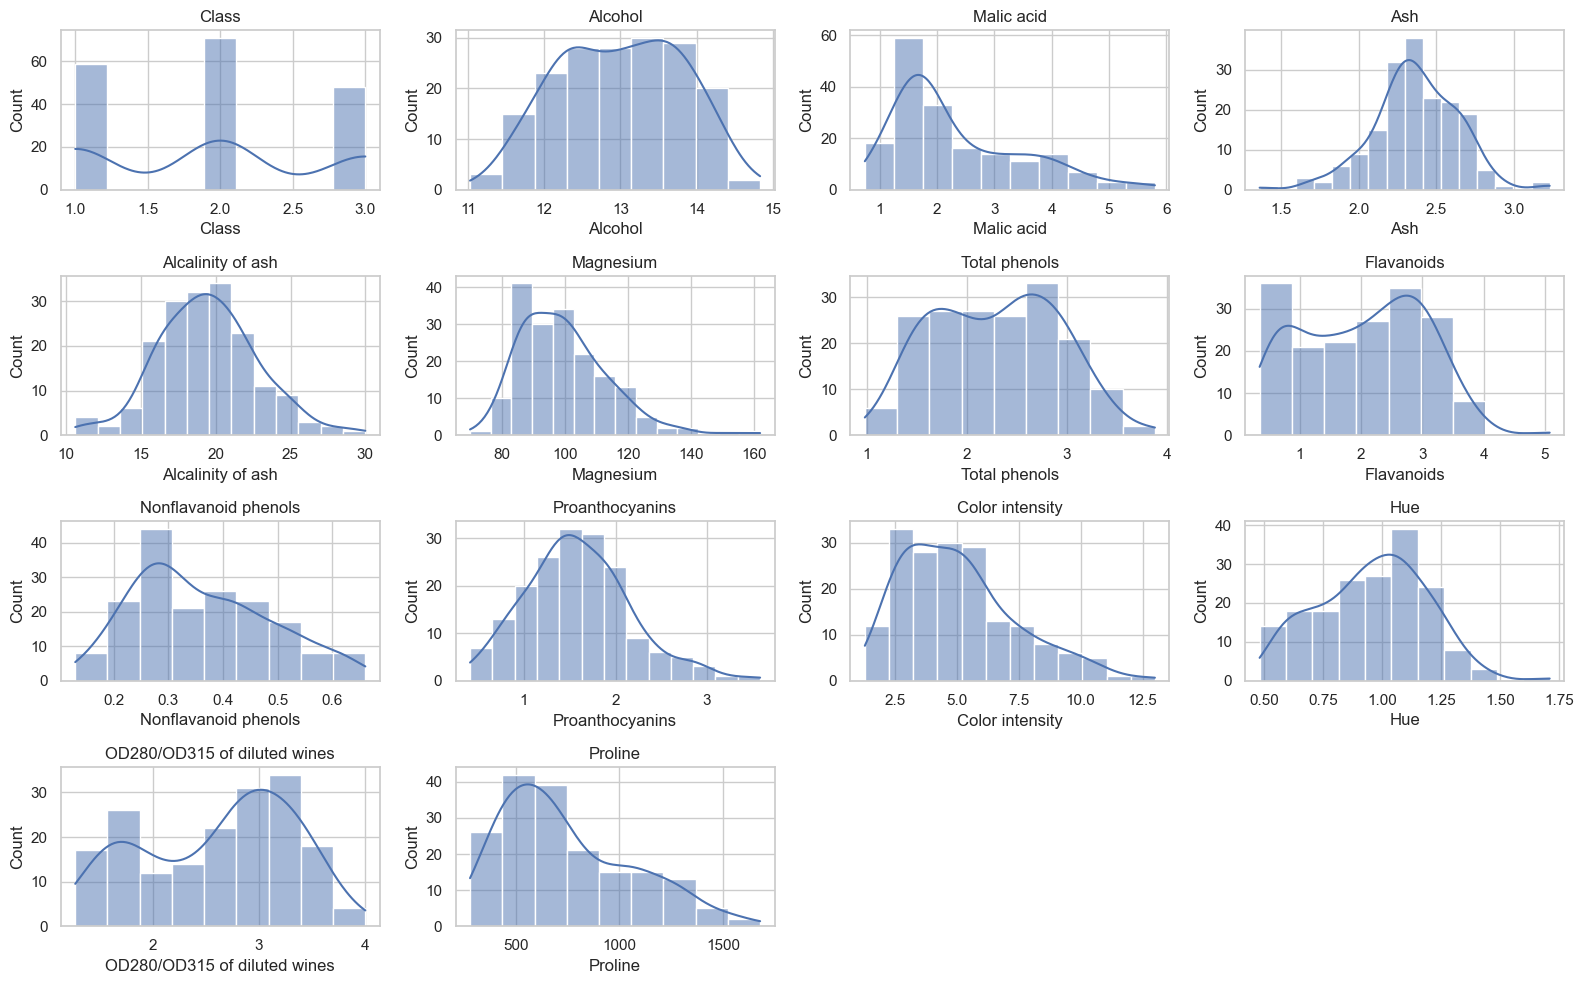

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
for i, column in enumerate(wine.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(wine[column], kde=True)
    plt.title(column)
    plt.tight_layout()
plt.show()

En estos histogramas podemos ver las variables del conjunto de datos Wine

Class: es la variable a predecir, es una clasificacion con tres instancias.

Alcohol: En un rango de 11 a 15, los datos se distribuyen, creando una campana, la mayoria de vinos se concentran en grados de alcohol de 12 a 14. los datos podrian ser normales. 

Malic acid: En un rango de 1 a 6, la mayoria de datos se concentran en entre el rango 1 - 2, los datos hacen forma de campana al principio pero luego se alargan hasta estender la  forma. 

Ash: En un rango de 0 a 3.5, la forma asemeja a una campana, los datos se concentran en rango de 2 y 2.5.los datos podrian ser normales.

Alcalinity of ash: En un rango de 10 a 30, la forma asemeja a una campana, los datos se concentran en rango de 15 y 20. datos podrian ser normales.  

Magnesium: Rango de 0 a 160, los datos se concentran en el rango de 80-100. parece que hace forma de campana el histograma aunque se alarga al final. 

Total phenols: Rango de 1 - 4, los datos se concentran entre 2-3. parece que hace forma de campana el histograma

Flavanoids: Rango de 0 - 5, los datos se concentran entre 0-1 y 2-3. no parece que hace forma de campana el histograma.

Nonflavanoid phenols: Rango de 0.0 - 0.65, los datos se concentran entre 0.2 y 0.3. no parece que hace forma de campana el histograma, parece que los datos son mas dispersos.

Proanthocyanins:  Rango de 0 - 4, los datos se concentran entre 1 y 2.  parece que hace forma de campana el histograma. con alguna variacion. 

Color intensity: Rango de 0.0 - 12.5, los datos se concentran entre 2.5-7.5. parece que hace forma de campana el histograma. pero se puede ver que los datos se dispersan y generan que se alargue la forma.

Hue:  Rango de 0.50 - 1.75, los datos se concentran entre 1.0 y 1.25.  parece que hace forma de campana el histograma. aunque con alguna variacion podria deverse a que los datos estan dispersos. 

OD280/OD315 of diluted wines: Rango de 0 - 4, los datos se concentran hacia 3.  parece que hace forma de doble campana el histograma. con alguna variacion en el rango 2. 

Proline: Rango de 0 - 1.600, los datos se concentran entre 500 y 1.000.  parece que hace forma de campana el histograma. con alguna variacion que hace que se alargue la forma. 

In [24]:
X=wine.drop("Class",axis=1)
y=wine.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


In [26]:
X_train.shape

(124, 13)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 90 to 37
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       124 non-null    float64
 1   Malic acid                    124 non-null    float64
 2   Ash                           124 non-null    float64
 3   Alcalinity of ash             124 non-null    float64
 4   Magnesium                     124 non-null    int64  
 5   Total phenols                 124 non-null    float64
 6   Flavanoids                    124 non-null    float64
 7   Nonflavanoid phenols          124 non-null    float64
 8   Proanthocyanins               124 non-null    float64
 9   Color intensity               124 non-null    float64
 10  Hue                           124 non-null    float64
 11  OD280/OD315 of diluted wines  124 non-null    float64
 12  Proline                       124 non-null    int64  
dtypes: fl

Para X_train, tenemos un conjunto de datos con 124 filas y 13 columnas (70% del connjunto original). todos los datos estan completos en todas las variables, no hay datos faltantes, hay dos variables con diferente tipo de dato float64, Magnesium y Proline de tipo (int64).

In [28]:
X_test.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488


In [29]:
X_test.shape

(54, 13)

In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 161 to 12
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       54 non-null     float64
 1   Malic acid                    54 non-null     float64
 2   Ash                           54 non-null     float64
 3   Alcalinity of ash             54 non-null     float64
 4   Magnesium                     54 non-null     int64  
 5   Total phenols                 54 non-null     float64
 6   Flavanoids                    54 non-null     float64
 7   Nonflavanoid phenols          54 non-null     float64
 8   Proanthocyanins               54 non-null     float64
 9   Color intensity               54 non-null     float64
 10  Hue                           54 non-null     float64
 11  OD280/OD315 of diluted wines  54 non-null     float64
 12  Proline                       54 non-null     int64  
dtypes: fl

Para X_test, tenemos un conjunto de datos con 54 filas y 13 columnas (30% del conjunto original). todos los datos estan completos en todas las variables, no hay datos faltantes, hay dos variables con diferente tipo de dato float64, Magnesium y Proline de tipo (int64).

#### Analisis Estadistico

In [31]:
X_train.describe().round(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000,124.000
mean,12.949,2.460,2.357,19.693,98.218,2.236,1.941,0.368,1.546,4.953,0.959,2.575,724.605
std,0.790,1.191,0.276,3.201,13.360,0.628,0.997,0.120,0.591,2.386,0.236,0.731,288.278
min,11.030,0.900,1.700,11.200,70.000,0.980,0.340,0.130,0.410,1.280,0.560,1.270,278.000
25%,12.338,1.610,2.200,17.750,88.000,1.695,1.012,0.270,1.148,3.025,0.750,1.898,500.000
50%,12.995,1.960,2.335,19.500,97.000,2.210,1.970,0.340,1.460,4.500,0.980,2.760,666.000
75%,13.512,3.385,2.552,21.500,104.250,2.725,2.680,0.430,1.870,5.812,1.120,3.170,893.250
max,14.830,5.800,3.230,28.500,162.000,3.880,5.080,0.630,3.580,13.000,1.710,4.000,1510.000


In [32]:
X_test.describe().round(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000
mean,13.119,2.053,2.387,19.041,103.241,2.430,2.232,0.347,1.694,5.299,0.955,2.697,798.074
std,0.856,0.871,0.273,3.629,15.784,0.605,0.983,0.133,0.518,2.156,0.212,0.657,366.721
min,11.410,0.740,1.360,10.600,84.000,1.280,0.470,0.140,0.420,1.950,0.480,1.290,312.000
25%,12.382,1.545,2.272,16.425,89.250,1.908,1.300,0.245,1.350,3.362,0.860,2.310,520.000
50%,13.280,1.755,2.410,19.050,101.000,2.555,2.380,0.320,1.765,5.250,0.960,2.875,697.000
75%,13.768,2.482,2.555,21.500,114.250,2.938,2.998,0.448,2.018,6.360,1.098,3.198,1053.750
max,14.380,4.610,2.920,30.000,151.000,3.400,3.930,0.660,2.960,11.750,1.310,3.590,1680.000


In [33]:
wine.describe().round(3)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


##### Comparacion Estadistica entre: X_train, X_test y Wine ( conjunto original ) 

###### Alcohol:

Mean: wine(conjunto original): 13.00, en X_train: 12.94, X_test: 13.11, la variacion esta al rededor del conjunto                    original. siendo X_train menor y X_test mayor.

std: wine(conjunto original): 0.81, en X_train: 0.79, X_test: 0.85, la variacion que presenta la media esta al rededor               del conjunto original. siendo X_train menor y X_test mayor.
         
min: wine(conjunto original): 11.03, en X_train: 11.03, X_test: 11.41, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
         
max: wine(conjunto original): 14.83, en X_train: 14.83, X_test: 14.38, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
         
###### Malic acid: 

Mean: wine(conjunto original): 2.33, en X_train: 2.46, X_test: 2.05, la variacion esta al rededor del conjunto                       original. siendo X_train mayor y X_test menor.

std: wine(conjunto original): 1.11, en X_train: 1.19, X_test: 0.87, la variacion que presenta la media esta al                       rededor del conjunto original. siendo X_train mayor y X_test menor.
            
min: wine(conjunto original): 0.74, en X_train: 0.90, X_test: 0.74, la variacion que presenta la media esta al                       rededor del conjunto original. siendo X_train mayor y X_test igual. 
            
max: wine(conjunto original): 5.80, en X_train: 5.80, X_test: 4.61, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test menor.

###### Ash:    

Mean: wine(conjunto original): 2.38, en X_train: 2.35, X_test: 2.38 la variacion esta al rededor del conjunto                         original. siendo X_train menor y X_test igual.

std: wine(conjunto original): 0.27, en X_train: 0.27, X_test: 0.27, es igual en todos.
         
min: wine(conjunto original): 0.70, en X_train: 0.70, X_test: 0.84, la variacion que presenta la media esta al                       rededor del conjunto original. siendo X_train igual y X_test mayor.
         
max: wine(conjunto original): 3.23, en X_train: 3.23, X_test: 2.92, la variacion que presenta la media esta al                       rededor del conjunto original. siendo X_train igual y X_test menor.
      
###### Alcalinity of ash: 

Mean: wine(conjunto original): 19.49, en X_train: 19.69, X_test: 19.04, la variacion esta al rededor del                             conjunto original. siendo X_train mayor y X_test menor.

std: wine(conjunto original): 3.34, en X_train: 3.20, X_test: 3.62, la variacion que presenta la media                               esta al rededor del conjunto original. siendo X_train menor y X_test mayor.
                   
min: wine(conjunto original): 10.60, en X_train: 11.20, X_test: 10.60, la variacion que presenta la media                           esta al rededor del conjunto original. siendo X_train mayor y X_test igual.
                   
max: wine(conjunto original): 30.00, en X_train: 28.50, X_test: 30.00, la variacion que presenta la media                           esta al rededor del conjunto original. siendo X_train igual y X_test mayor.
         
###### Magnesium: 

Mean: wine(conjunto original): 99.74, en X_train: 98.21, X_test: 103.24, la variacion esta al rededor del conjunto                    original. siendo X_train menor y X_test mayor.

std: wine(conjunto original): 14.28, en X_train: 13.36, X_test: 15.78, la variacion que presenta la media, esta al                   rededor del conjunto original. siendo X_train menor y X_test mayor.
           
min: wine(conjunto original): 00.00, en X_train: 00.00, X_test: 00.00, la variacion que presenta la media, esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
           
max: wine(conjunto original): 162.00, en X_train: 162.00, X_test: 151.00, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test menor.
         
###### Total phenols:

Mean: wine(conjunto original): 2.29, en X_train: 2.23, X_test: 2.43, la variacion esta al rededor del conjunto                       original. siendo X_train menor y X_test mayor.

std: wine(conjunto original): 0.62, en X_train: 0.62, X_test: 0.60, la variacion que presenta la media, esta al                   rededor del conjunto original. siendo X_train menor y X_test mayor.
              
min: wine(conjunto original): 0.98, en X_train: 0.98, X_test: 1.28, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
              
max: wine(conjunto original): 3.88, en X_train: 3.88, X_test: 3.40, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
         
###### Flavanoids:

Mean: wine(conjunto original): 2.02, en X_train: 1.94, X_test: 2.23, la variacion esta al rededor del conjunto                    original. siendo X_train menor y X_test mayor.

std: wine(conjunto original): 0.99, en X_train: 0.99, X_test: 0.0.98, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test menor.

min: wine(conjunto original): 0.34, en X_train: 0.34, X_test: 0.47, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test mayor.
             
max: wine(conjunto original): 5.08, en X_train: 5.08, X_test: 3.93, la variacion que presenta la media esta al                   rededor del conjunto original. siendo X_train igual y X_test menor.
             
             
#### Conclusion Estadistica: 

El analisis estadistico de los tres conjuntos es similar para Mean, std, min y max. los datos tienen variaciones minimas el conjunto original siempre tiende a ser el centro de las metricas X_train: tiende a ser menor en casi todas las metricas aunque en algunas es igual y en otras pocas es mayor y X_test, tiende a ser mayor en casi todas las metricas, aunque en algunas es igual o en otras pocas es menor. en general los conjuntos son similares en sus estadsiticas. aunque varie la cantidad de datos. por lo cual podemos decir que son conjunots homogeneos.

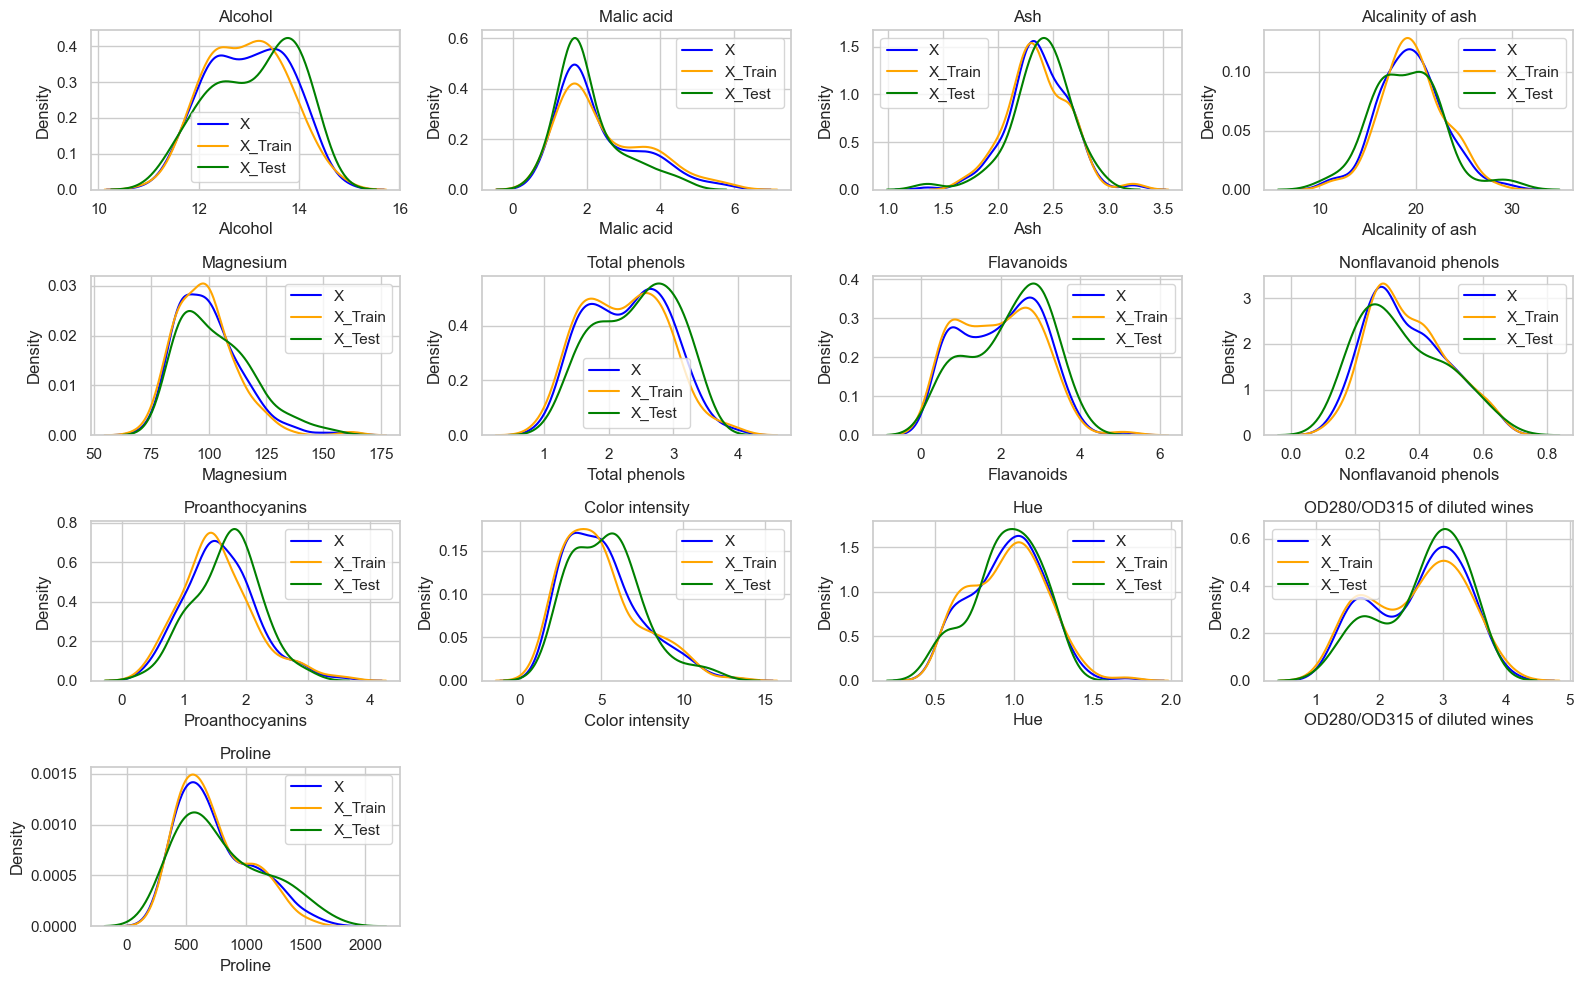

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
colors = ['blue', 'orange', 'green']
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(X[column], color=colors[0], label='X')
    sns.kdeplot(X_train[column],  color=colors[1], label='X_Train')
    sns.kdeplot(X_test[column], color=colors[2], label='X_Test')
    plt.title(column)
    plt.tight_layout()
    plt.legend()
plt.show()

##### Comparacion Estadistica - Grafica  entre: X_train, X_test y Wine ( conjunto original ) 

Alcohol:Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el histograma hace una especie de campana, lo cual podria indicar normalidad y homogeneidad de los datos. 

Malic acid: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma hace una especie de campana al principio de la grafica pero luego de alarga en el eje x, hasta desfigurar la forma. 

Ash:Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma hace una especie de campana. aunque X_test hace la forma mas parecida a una campana. podria tener mejor distribucion de los datos. 

Alcalinity of ash: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma hace una especie de campana. aunque  X_test, parece tener una distirbucion diferentes en el pico de la  camapana. 

Magnesium: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma hace una especie de campana. al principio de la grafica pero luego de alarga en el eje x, hasta desfigurar la forma. X_test es el que mas varia su forma respecto a los demas. 

Total phenols:  Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma hace una especie de campana. sin embargo en el pico tiene una variacion lo cual desfigura la forma de campana. X_test es el que mas varia su forma respecto a los demas. 

Flavanoids:  Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma para los tres trata de hacer campana pero se deforma, aunque el comportamiento de los tres es similar, X_test es el que mas varia.  

Nonflavanoid phenols: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma intenta hacer una campana de Gauss, pero tiene lagunas variaciones cerca del pico de la forma, sin embargo las formas son similares aunque, X_test es el que mas varia su forma respecto a los demas.  

Proanthocyanins: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma intenta hacer una campana de Gauss, el ocnjunto que mas varia su forma respecto a los demas es X_test.

Color intensity:  Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma intenta hacer una campana de Gauss, pero al final se alarga, X_test es el que mas varia respecto a los otros dos conjuntos. 

Hue: Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma intenta hacer una campana de Gauss, aunque hay variaciones y no hacen la camapan perfecta, X_test es el que mas varia de forma. 

OD280/OD315 of diluted wines:  Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, pareciera que se hiciera una campana, pero el pico se deforma, creando dos picos.

Proline:  Esta  varible, en los tres conjuntos de datos, tienen comportamiento similar graficamente, el  histograma intenta hacer una campana de Gauss, pero se alarga al final, de nuevo X_test tiene mayor variacion. 

##### Conclusion Grafica: 

Los tres conjuntos de datos son similares graficamente y estadisticamente, tienen comportamientos similares, X_test tiende a tener una forma distinta, respecto a X y X__train. 

### Ejercicio 1
Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

#### Modelos a usar: 

##### DecisionTreeClassifier: 

Es un modelo comunmente usado para ejercicios de clasificacion, por:

- su facil interpretabilidad y sencilles para visualizar.

- Puede capturar fácilmente patrones no lineales.

- Requiere menos procesamiento previo de datos por parte del usuario; por ejemplo, no es necesario normalizar las columnas.

- El árbol de decisión no tiene suposiciones sobre la distribución debido a la naturaleza no paramétrica del algoritmo.

##### K-nearest Neighbors (KNN):

- Es extremadamente fácil de implementar en su forma más básica pero puede realizar tareas bastante complejas.

- Facil de interpretar y visualizar.

- KNN es un algoritmo de aprendizaje no paramétrico , lo que significa que no asume nada sobre los datos subyacentes.

- Es adecuado para conjuntos de datos pequeños. 

#####   RandomForestClassifier: 

- No es necesario normalizar los datos.

- tiende a ser menos propenso al sobreajuste (overfitting) en comparación con un solo árbol de decisión.

- Puede manejar tanto variables categóricas como numéricas sin requerir preprocesamiento extenso.

- Los árboles de decisión en un Random Forest son menos sensibles a los valores atípicos en comparación con algunos otros algoritmos.

- Es relativamente fácil de usar y no requiere una afinación de hiperparámetros extensa para obtener resultados sólidos..





In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [72]:
models = [DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=42)]

In [73]:
predictions = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[type(model).__name__,] = y_pred
df_predictions = pd.DataFrame(predictions)

Con un ciclo for hacemos predicciones para cada modelo de los tres escogidos.

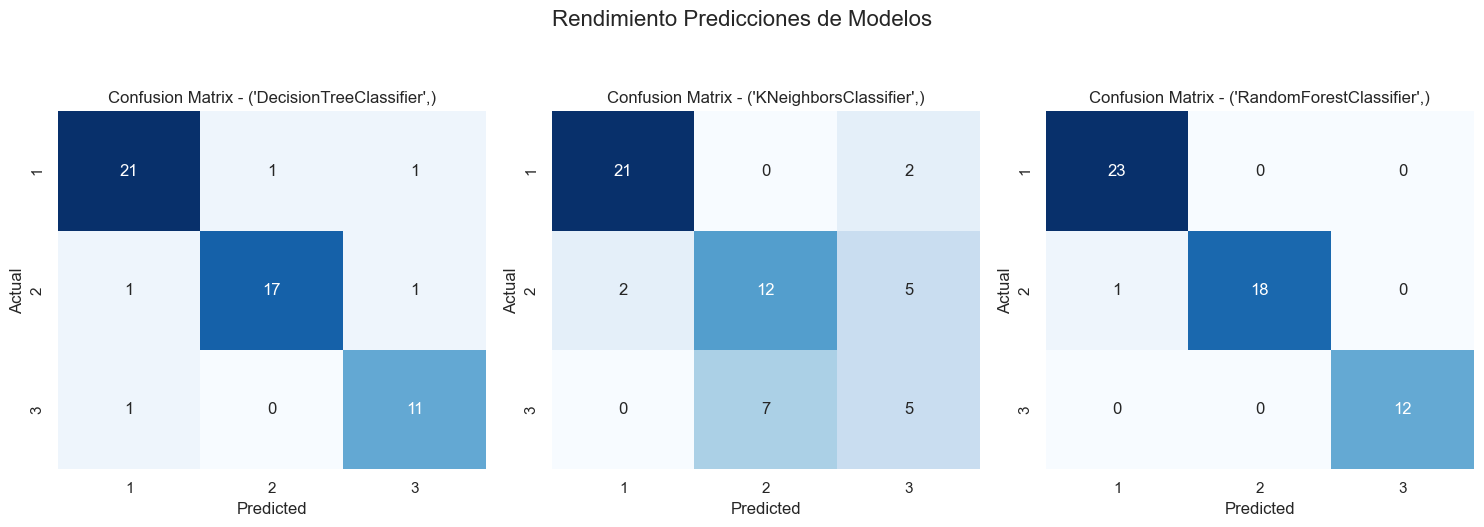

In [118]:
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')
classes = sorted(y_test.unique())
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, model_name in enumerate(predictions.keys()):
    cm_model = confusion_matrix(y_test, predictions[model_name])
    plot_confusion_matrix(axes[i], cm_model, model_name)
plt.suptitle('Rendimiento Predicciones de Modelos', y=1.05, fontsize=16)
plt.tight_layout()
plt.savefig('Rendimiento Predicciones de Modelos.png')
plt.show()

##### Matriz de Confusión Multiclase:
Una matriz de confusión para clasificación multiclase tiene dimensiones NxN, donde N es el número de clases. Cada fila de la matriz representa las instancias en una clase real, y cada columna representa las instancias en una clase predicha.

para nuestro caso, la matriz de confusion, con 54 instancias:

Observamos que las mejores predicciones fueron del modelo RandomForestClassifier:

- Class 1: 23 predicciones acertadas de 23. 
- Clase 2: 18 predicicones acertadas de 19. 1 la predijo como class 1
- Clase 3: 12 predicciones acertadas de 12. 

los demas modelos tuvieron predicciones menos exactas:  

KNeighborsClassifier

- Class 1: 21 predicciones acertadas de 23.  
- Clase 2: 12 predicicones acertadas de 19.
- Clase 3: 5 predicciones acertadas de 12. 7 las clasifico como Class 2 (incorrecto)

DecisionTreeClassifier

- Class 1: 21 predicciones acertadas de 23.  
- Clase 2: 17 predicicones acertadas de 19. 1 la predijo como class 1
- Clase 3: 11 predicciones acertadas de 12. 

##### Conclusion:
El modelo que mejor predijo es: RandomForestClassifier

### Ejercicio 2
Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.

In [75]:
output1 = []

for model_name in df_predictions.columns:  
    y_pred = df_predictions[model_name]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    output1.append({
        'Model': str(model_name),  # Convertir el nombre del modelo a string
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    })
output_df1 = pd.DataFrame(output1)
output_df1.to_csv('Evaluacion de modelos con metricas1.csv', index=False)
output_df1 

,Model,Accuracy,Precision,Recall,F1-Score
0,"('DecisionTreeClassifier',)",0.907407,0.909228,0.907407,0.907768
1,"('KNeighborsClassifier',)",0.703704,0.703704,0.703704,0.703704
2,"('RandomForestClassifier',)",0.981481,0.982253,0.981481,0.981428


##### Accuracy (Exactitud):

Es una métrica general del rendimiento del modelo. La accuracy se calcula como el número de predicciones correctas dividido por el número total de predicciones, y su valor puede oscilar entre 0 y 1. 

para nuestros modelos el Accuracy mas alto es de RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.70).

##### Precision (Precisión)

un valor de precisión más cercano a 1 indica un mejor rendimiento en términos de la capacidad del modelo para hacer predicciones positivas correctamente.

La precisión se calcula como el número de verdaderos positivos (TP) dividido por la suma de verdaderos positivos y falsos positivos (FP)

Un modelo puede tener una alta precisión al predecir correctamente las instancias positivas, pero si tiene un recall bajo (es decir, no captura todas las instancias positivas reales), podría estar perdiendo información valiosa.

para nuestro caso, la presicion mas alta es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.70).

##### Recall (Recuperación o Sensibilidad)

Un valor de recall más cercano a 1 indica un mejor rendimiento en términos de la capacidad del modelo para capturar todas las instancias positivas reales. La recall se calcula como el número de verdaderos positivos (TP) dividido por la suma de verdaderos positivos y falsos negativos (FN)

para nuestro caso, El Recall mas alto es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.70).

##### F1-Score

Un valor de F1-Score más cercano a 1 indica un mejor rendimiento del modelo. El F1-Score es una métrica que combina tanto la precisión como el recall, proporcionando una medida equilibrada del rendimiento del modelo.

Un F1-Score más cercano a 1 es deseable porque indica que el modelo está realizando bien en ambas dimensiones (precisión y recall). Sin embargo, es importante tener en cuenta que el F1-Score no proporciona información específica sobre el desempeño en precision o recall individualmente.

para nuestro caso, el F1-Score, mas alto es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.70).

cual mejor modelo y por que? 
El mejor modelo es RandomForestClassifier por que nos muestra las mejores metricas para Accuracy, Precision, Recall, F1-Score. ademas vemos en la matriz de confusion que fue el modelo que mas se ajusto a los valores reales y_test.


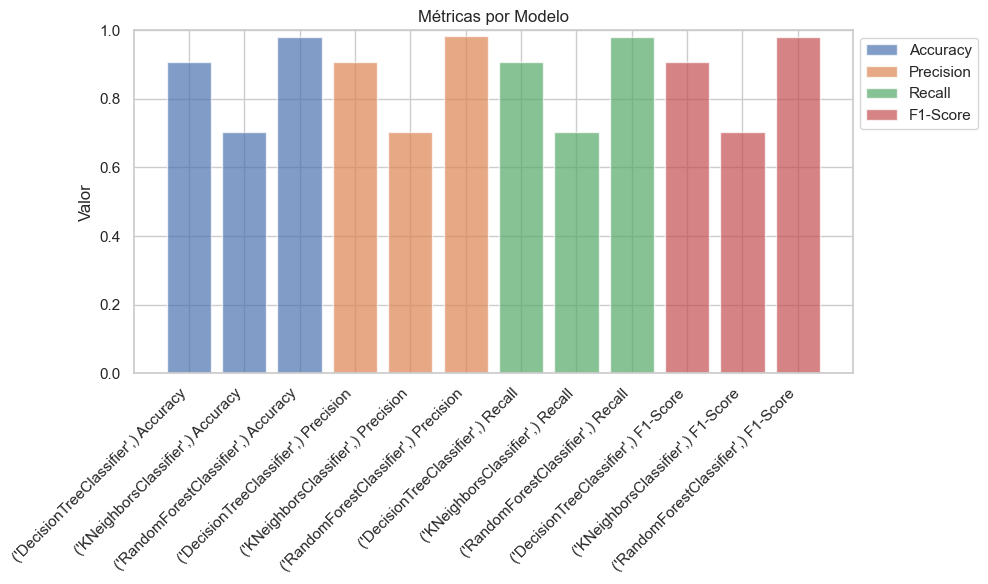

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))
models = output_df1['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    ax.bar(models + f' {metric}', output_df1[metric], alpha=0.7, label=metric)
ax.set_ylim(0, 1)
ax.set_ylabel('Valor')
ax.set_title('Métricas por Modelo')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Metricas modelos estandar.png')
plt.show()

##### Conclusion: 
El mejor modelo con los puntajes en las metricas mas altos (Accuracy, Precision, Recall, F1-Score) es  RandomForestClassifier. este tienes las predicciones mas cercanas al real, En rendimeinto es el mejor modelo para nuestras predicciones. 

### Ejercicio 3
Entrena usando los diferentes parámetros que admiten para mejorar su predicción.

In [77]:
dtc2= DecisionTreeClassifier(random_state=42)
knn2= KNeighborsClassifier()
rfc2= RandomForestClassifier(random_state=42)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
dtc2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [102]:
param_grid_dtc2 = {
    'ccp_alpha': [0.0, 0.01],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 15],
    'max_features': [None, 'sqrt'],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_weight_fraction_leaf': [0.0, 0.01],
    'splitter': ['best', 'random']
    
}
grid_search_dtc2 = GridSearchCV(dtc2, param_grid_dtc2, cv=5, scoring='accuracy')
grid_search_dtc2.fit(X_train, y_train)
best_dtc2_model = grid_search_dtc2.best_estimator_
print(f'Best r2-score: {grid_search_dtc2.best_score_:.3f}\n')
print("Mejores parámetros para DecisionTreeClassifier:", grid_search_dtc2.best_params_)

Best r2-score: 0.928

Mejores parámetros para DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


Los hiperparametros que fueron mejorados son los siguientes:
- 'ccp_alpha': [0.0, 0.01],
- 'class_weight': [None, 'balanced'],
- 'criterion': ['gini', 'entropy'],
- 'max_depth': [None, 15],
- 'max_features': [None, 'sqrt'],
- 'min_samples_split': [2, 10, 20],
- 'min_weight_fraction_leaf': [0.0, 0.01],
- 'splitter': ['best', 'random']

los hiperparametros que mejoraron frente a los por defecto fueron:
Ninguna mejoria propuesta fue mejor a la por defecto. 

In [103]:
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [104]:
param_grid_knn2= {
    'algorithm': ['auto', 'kd_tree'],
    'leaf_size': [10, 30, 50],
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn2 = GridSearchCV(knn2, param_grid_knn2, cv=5, scoring='accuracy')
grid_search_knn2.fit(X_train, y_train)
best_knn2_model = grid_search_knn2.best_estimator_
print(f'Best r2-score: {grid_search_knn2.best_score_:.3f}\n')
print("Mejores parámetros para  KNeighborsClassifier:", grid_search_knn2.best_params_)

Best r2-score: 0.798

Mejores parámetros para  KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


Los hiperparametros que fueron mejorados son los siguientes:
- 'algorithm': ['auto', 'kd_tree'],
- 'leaf_size': [10, 30, 50],
- 'n_neighbors': [3, 5, 7, 9],
- 'weights': ['uniform', 'distance'],
- 'p': [1, 2]

los hiperparametros que mejoraron frente a los por defecto fueron: 

- 'leaf_size': 10
- 'n_neighbors': 7
- 'p': 1
- 'weights': 'distance'

In [105]:
rfc2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [109]:
param_grid_rfc2 = {
    'class_weight': [None, 'balanced'],
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'oob_score': [True, False],
}
grid_search_rfc2 = GridSearchCV(rfc2, param_grid_rfc2, cv=5, scoring='accuracy', error_score='raise')
grid_search_rfc2.fit(X_train, y_train)
best_rfc2_model = grid_search_rfc2.best_estimator_
print(f'Best r2-score: {grid_search_rfc2.best_score_:.3f}\n')
print("Mejores parámetros paraRandomForestClassifier:", grid_search_rfc2.best_params_)

Best r2-score: 0.992

Mejores parámetros paraRandomForestClassifier: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'oob_score': True}


Los hiperparametros que fueron mejorados son los siguientes:

- 'class_weight': [None, 'balanced'],
- 'n_estimators': [50, 100],
- 'max_depth': [None, 10, 20],
- 'min_samples_split': [2, 5],
- 'min_samples_leaf': [1, 2],
- 'oob_score': [True, False],

los hiperparametros que mejoraron frente a los por defecto fueron:
- 'min_samples_leaf': [1, 2],
- 'oob_score': [True, False],

##### Conclusion de busqueda de hipoerparametros: 

- El modelo con el mejor Best r2-score: fue RandomForestClassifier con 0.992
- Los hiperparametros estandar pueden mejorarse explorando agregar parametros diferenteso que admiten los modelos o agregando folds a los por defecto.
- Algunos hiperparametros son comunes en los modelos.

In [323]:
best_models = [DecisionTreeClassifier(**grid_search_dtc2.best_params_, random_state=42),
          KNeighborsClassifier(**grid_search_knn2.best_params_),
          RandomForestClassifier(**grid_search_rfc2.best_params_, random_state=42)]

Hacemos un diccionario con los best_model de cada modelo con hiperparametros mejorados.

In [320]:
predictions2 = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions2[type(model).__name__,] = y_pred
df_predictions2 = pd.DataFrame(predictions2)

Entrenamos y hacemos las predicciones para cada modelo con hiperparametros mejorados.

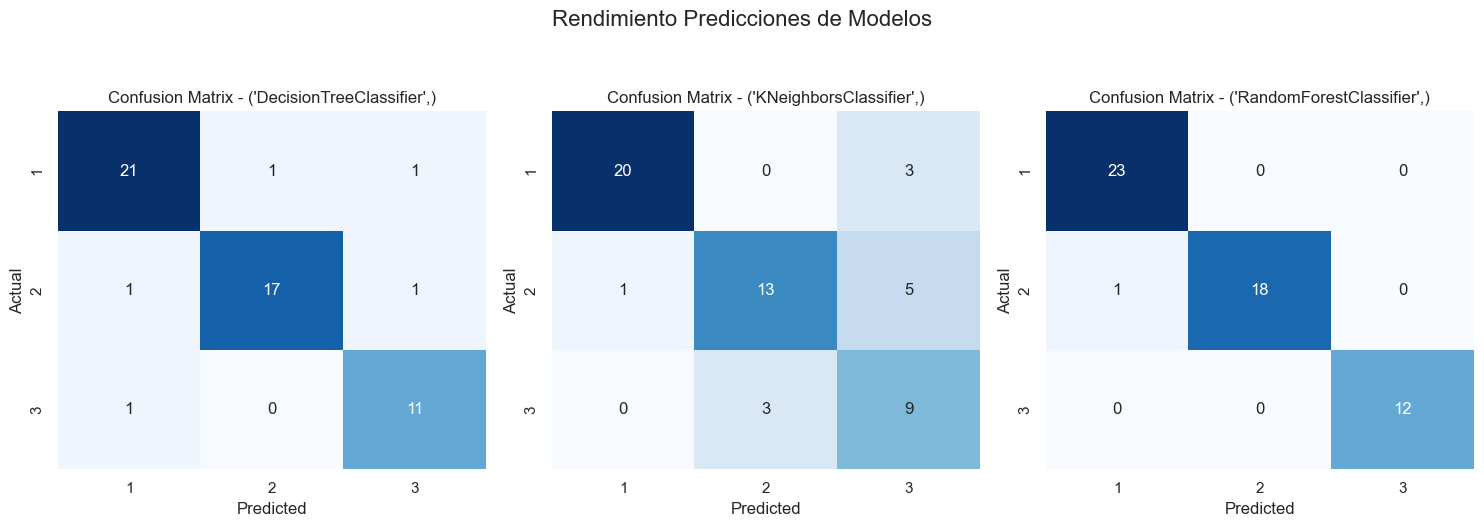

In [308]:
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')
classes = sorted(y_test.unique())
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, model_name in enumerate(predictions2.keys()):
    cm_model = confusion_matrix(y_test, predictions2[model_name])
    plot_confusion_matrix(axes[i], cm_model, model_name)
plt.suptitle('Rendimiento Predicciones de Modelos', y=1.05, fontsize=16)
plt.tight_layout()
plt.savefig('Rendimiento Predicciones de Modelos mejorados.png')
plt.show()

Matriz de Confusión Multiclase para valorar redimiento de modelos mejorados:

Observamos que las mejores predicciones fueron del modelo RandomForestClassifier:

- Class 1: 23 predicciones acertadas de 23.
- Clase 2: 18 predicicones acertadas de 19. 1 la predijo como class 1
- Clase 3: 12 predicciones acertadas de 12.

KNeighborsClassifier

- Class 1: 20 predicciones acertadas de 23. 3 las clasifico como Class 3
- Clase 2: 13 predicicones acertadas de 19. 1 las clasifico como Class 1 y 5 como Class 3
- Clase 3: 9 predicciones acertadas de 12. 3 las clasifico como Class 2 

DecisionTreeClassifier

- Class 1: 21 predicciones acertadas de 23. 1 la clasifico como Class 2 y 1 como Class 3
- Clase 2: 17 predicicones acertadas de 19. 1 la predijo como class 1 y 1 como Class 3 
- Clase 3: 11 predicciones acertadas de 12. 1 la predijo como Class 1.


#### Conclusion:

El modelo que mejor rendimiento tiene para predecir es: RandomForestClassifier. su efectividad es muy buena casi del 100%.

##### Comparacion Grafica de Distribución de Predicciones de Modelos Estandar y Mejorados:

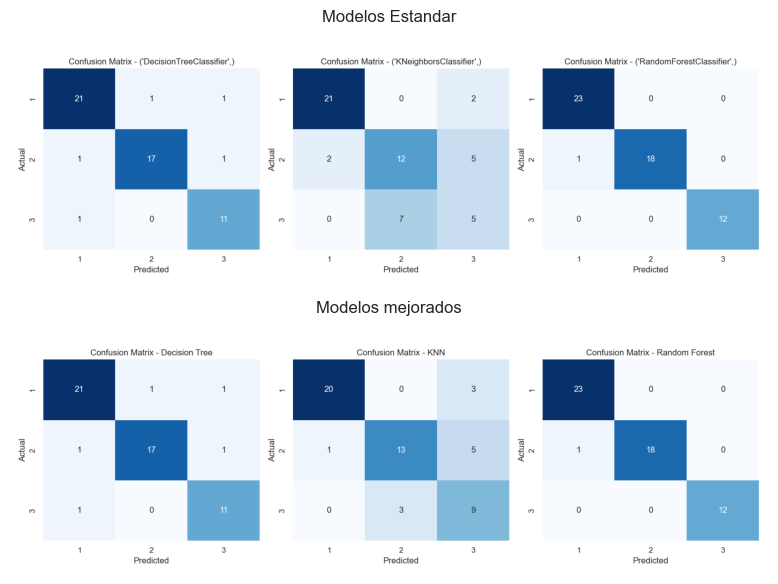

In [272]:
imagen1 = mpimg.imread('Rendimiento Predicciones de Modelos.png')
imagen2 = mpimg.imread('Rendimiento Predicciones de Modelos mejorados.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

##### RandomForestClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 23 predicciones acertadas de 23 vs Class 1 modelo estandar: 23 predicciones acertadas de 23
- Clase 2 modelo mejorado: 18 predicicones acertadas de 19 VS Class 2 modelo estandar: 18 predicicones acertadas de 19
- Clase 3 modelo mejorado: 12 predicciones acertadas de 12 VS Class 3 modelo estandar: 12 predicciones acertadas de 12

RandomForestClassifier mejorado, mantuvo sus predicciones acertadas igual que el modelo estandar. esto puede deberse a que el modelo tiene rendimientos muy buenos, aunque se mejoraron los hiperparametros, lo vuelva mas confiable.

##### KNeighborsClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 20 predicciones acertadas de 23 vs Class 1 modelo estandar: 21 predicciones acertadas de 23 (disminuyo 1 prediccion acertada respecto al modelo estandar).
- Clase 2 modelo mejorado: 13 predicicones acertadas de 19. vs Class 2 modelo estandar: 12 predicciones acertadas de 19 (Aumento 1 prediccion acertada respecto al modelo estandar).
- Clase 3 modelo mejorado: 9 predicciones acertadas de 12. vs Class 3 modelo estandar: 5 predicciones acertadas de 12 (mejoro en 4 prediccines acertadas respecto al modelo estandar).

KNeighborsClassifier mejorado , aunque empeoro en la Class 1, en las dos Class 2 y Class 3, mejoro sus predicciones respecto al modelo etsandar.

##### DecisionTreeClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 21 predicciones acertadas de 23 vs Class 1 modelo estandar: 21 predicciones acertadas de 23
- Clase 2 modelo mejorado: 17 predicicones acertadas de 19. vs Class 2 modelo estandar: 17 predicciones acertadas de 19 
- Clase 3 modelo mejorado: 11 predicciones acertadas de 12. vs Class 3 modelo estandar: 11 predicciones acertadas de 12

DecisionTreeClassifier mejorado , mantuvo las calidad de las predicciones igual al modelo estandar


In [471]:
output2 = []
for model in df_predictions2: #hacemos un ciclo for
    accuracy = accuracy_score(y_test, df_predictions2[model])
    precision = precision_score(y_test, df_predictions2[model], average='weighted')
    recall = recall_score(y_test, df_predictions2[model], average='weighted')
    f1 = f1_score(y_test, df_predictions2[model], average='weighted')
    output2.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    })
output_df2 = pd.DataFrame(output2)
output_df2.to_csv('Evaluacion de modelos mejorados con metricas.csv', index=False)
output_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,"(DecisionTreeClassifier,)",0.907407,0.909228,0.907407,0.907768
1,"(KNeighborsClassifier,)",0.777778,0.809170,0.777778,0.786512
2,"(RandomForestClassifier,)",0.981481,0.982253,0.981481,0.981428


##### Metricas de modelos mejorados:

##### Accuracy (Exactitud):
su valor puede oscilar entre 0 y 1.

para nuestros modelos mejorados el Accuracy mas alto es de RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.77).

##### Precision (Precisión)
un valor de precisión más cercano a 1 indica un mejor rendimiento. 

para nuestro caso, la presicion mas alta es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.80).

##### Recall (Recuperación o Sensibilidad)
Un valor de recall más cercano a 1 indica un mejor rendimiento en términos de la capacidad del modelo.

para nuestro caso, El Recall mas alto es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.77).

##### F1-Score
Un valor de F1-Score más cercano a 1 indica un mejor rendimiento del modelo.

para nuestro caso, el F1-Score, mas alto es para el modelo RandomForestClassifier con (0.98), seguido de DecisionTreeClassifier (0.90) y KNeighborsClassifier (0.78).

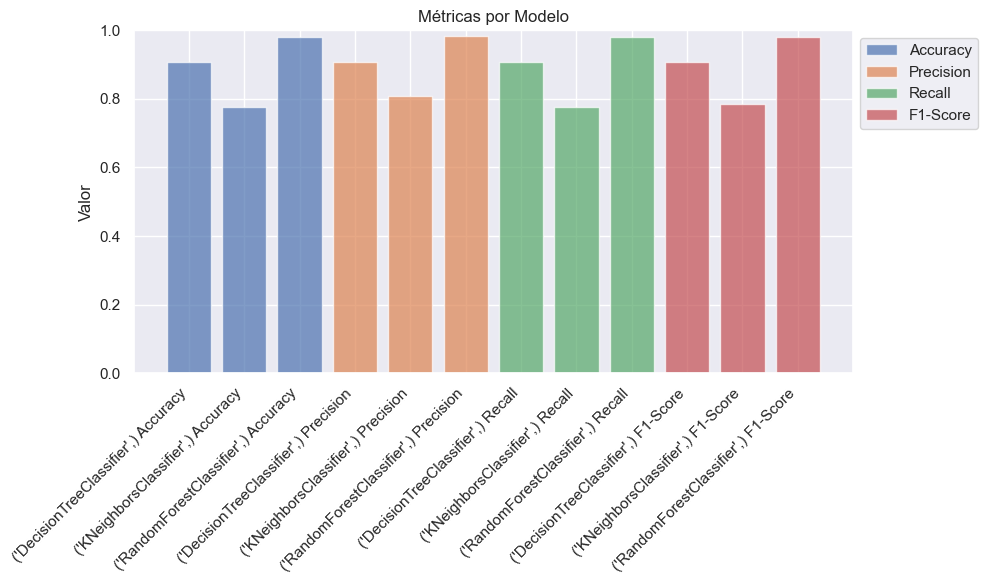

In [477]:
fig, ax = plt.subplots(figsize=(10, 6))

models = output_df2['Model'].map(lambda x: str(x))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for metric in metrics:
    ax.bar(models + f' {metric}', output_df2[metric], alpha=0.7, label=metric)

ax.set_ylim(0, 1)
ax.set_ylabel('Valor')
ax.set_title('Métricas por Modelo')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Metricas_modelos_mejorados.png')
plt.show()

- Accuracy:  El modelo con el valor mas cercano a 1 es que que mas se ajusta de los datos, RandomForestClassifier, es el que mas se ajusta. 
- Precision:  El modelo con el valor mas cercano a 1 es que que mas se ajusta de los datos, RandomForestClassifier, es el que mas se ajusta.
- Recall:  El modelo con el valor mas cercano a 1 es que que mas se ajusta de los datos, RandomForestClassifier, es el que mas se ajusta. 
- F1-Score:  El modelo con el valor mas cercano a 1 es que que mas se ajusta de los datos, RandomForestClassifier, es el que mas se ajusta. 

##### Cual mejor modelo y por qué? 

El mejor modelo es RandomForestClassifier, porque nos muestra las mejores metricas para Accuracy, Precision, Recall, F1-Score. ademas vemos en la matriz de confusion que fue el modelo que mas se ajusto a los valores reales.

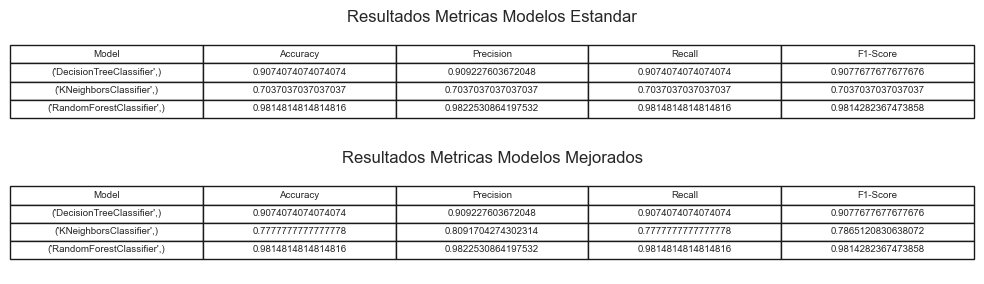

In [478]:
resultados1 = pd.read_csv('Evaluacion de modelos con metricas1.csv')
resultados2 = pd.read_csv('Evaluacion de modelos mejorados con metricas.csv')
# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Metricas Modelos Estandar')
# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off') 
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Metricas Modelos Mejorados')
plt.tight_layout()
plt.show()

##### Comparacion de rendimiento de modelos estandar vs modelos  mejorados:

El rendimiento de los modelos  segun las metricas antes y despues de ser mejoradas: 


Accuracy: El modelo con valor mas alto es RandomForestClassifie, estandar (0.9814), mejorado (0,9814), le sigue DecisionTreeClassifier, estandar (0.9074), mejorado (0,9074) y por ultimo KNeighborsClassifier, estandar (0.7037), mejorado (0.7777).

el unico modelo que mejoro esta metrica fue KNeighborsClassifier.

Precision: El modelo con valor mas alto es RandomForestClassifie, estandar (0.9822), mejorado (0.9822), le sigue DecisionTreeClassifier, estandar (0.9092), mejorado (0.9092) y por ultimo KNeighborsClassifier, estandar (0.7037), mejorado (0.8091).

el unico modelo que mejoro esta metrica fue KNeighborsClassifier.

Recall: El modelo con valor mas alto es RandomForestClassifie, estandar (0.9814), mejorado (0.9814), le sigue DecisionTreeClassifier, estandar (0.9074), mejorado (0.9074) y por ultimo KNeighborsClassifier, estandar (0.7037), mejorado (0.7777).

el unico modelo que mejoro esta metrica fue KNeighborsClassifier.

F1-Score: El modelo con valor mas alto es RandomForestClassifie, estandar (0.9814), mejorado (0.9814), le sigue DecisionTreeClassifier, estandar (0.9077), mejorado (0.9077) y por ultimo KNeighborsClassifier, estandar (0.7037), mejorado (0.7865).

el unico modelo que mejoro esta metrica fue KNeighborsClassifier.

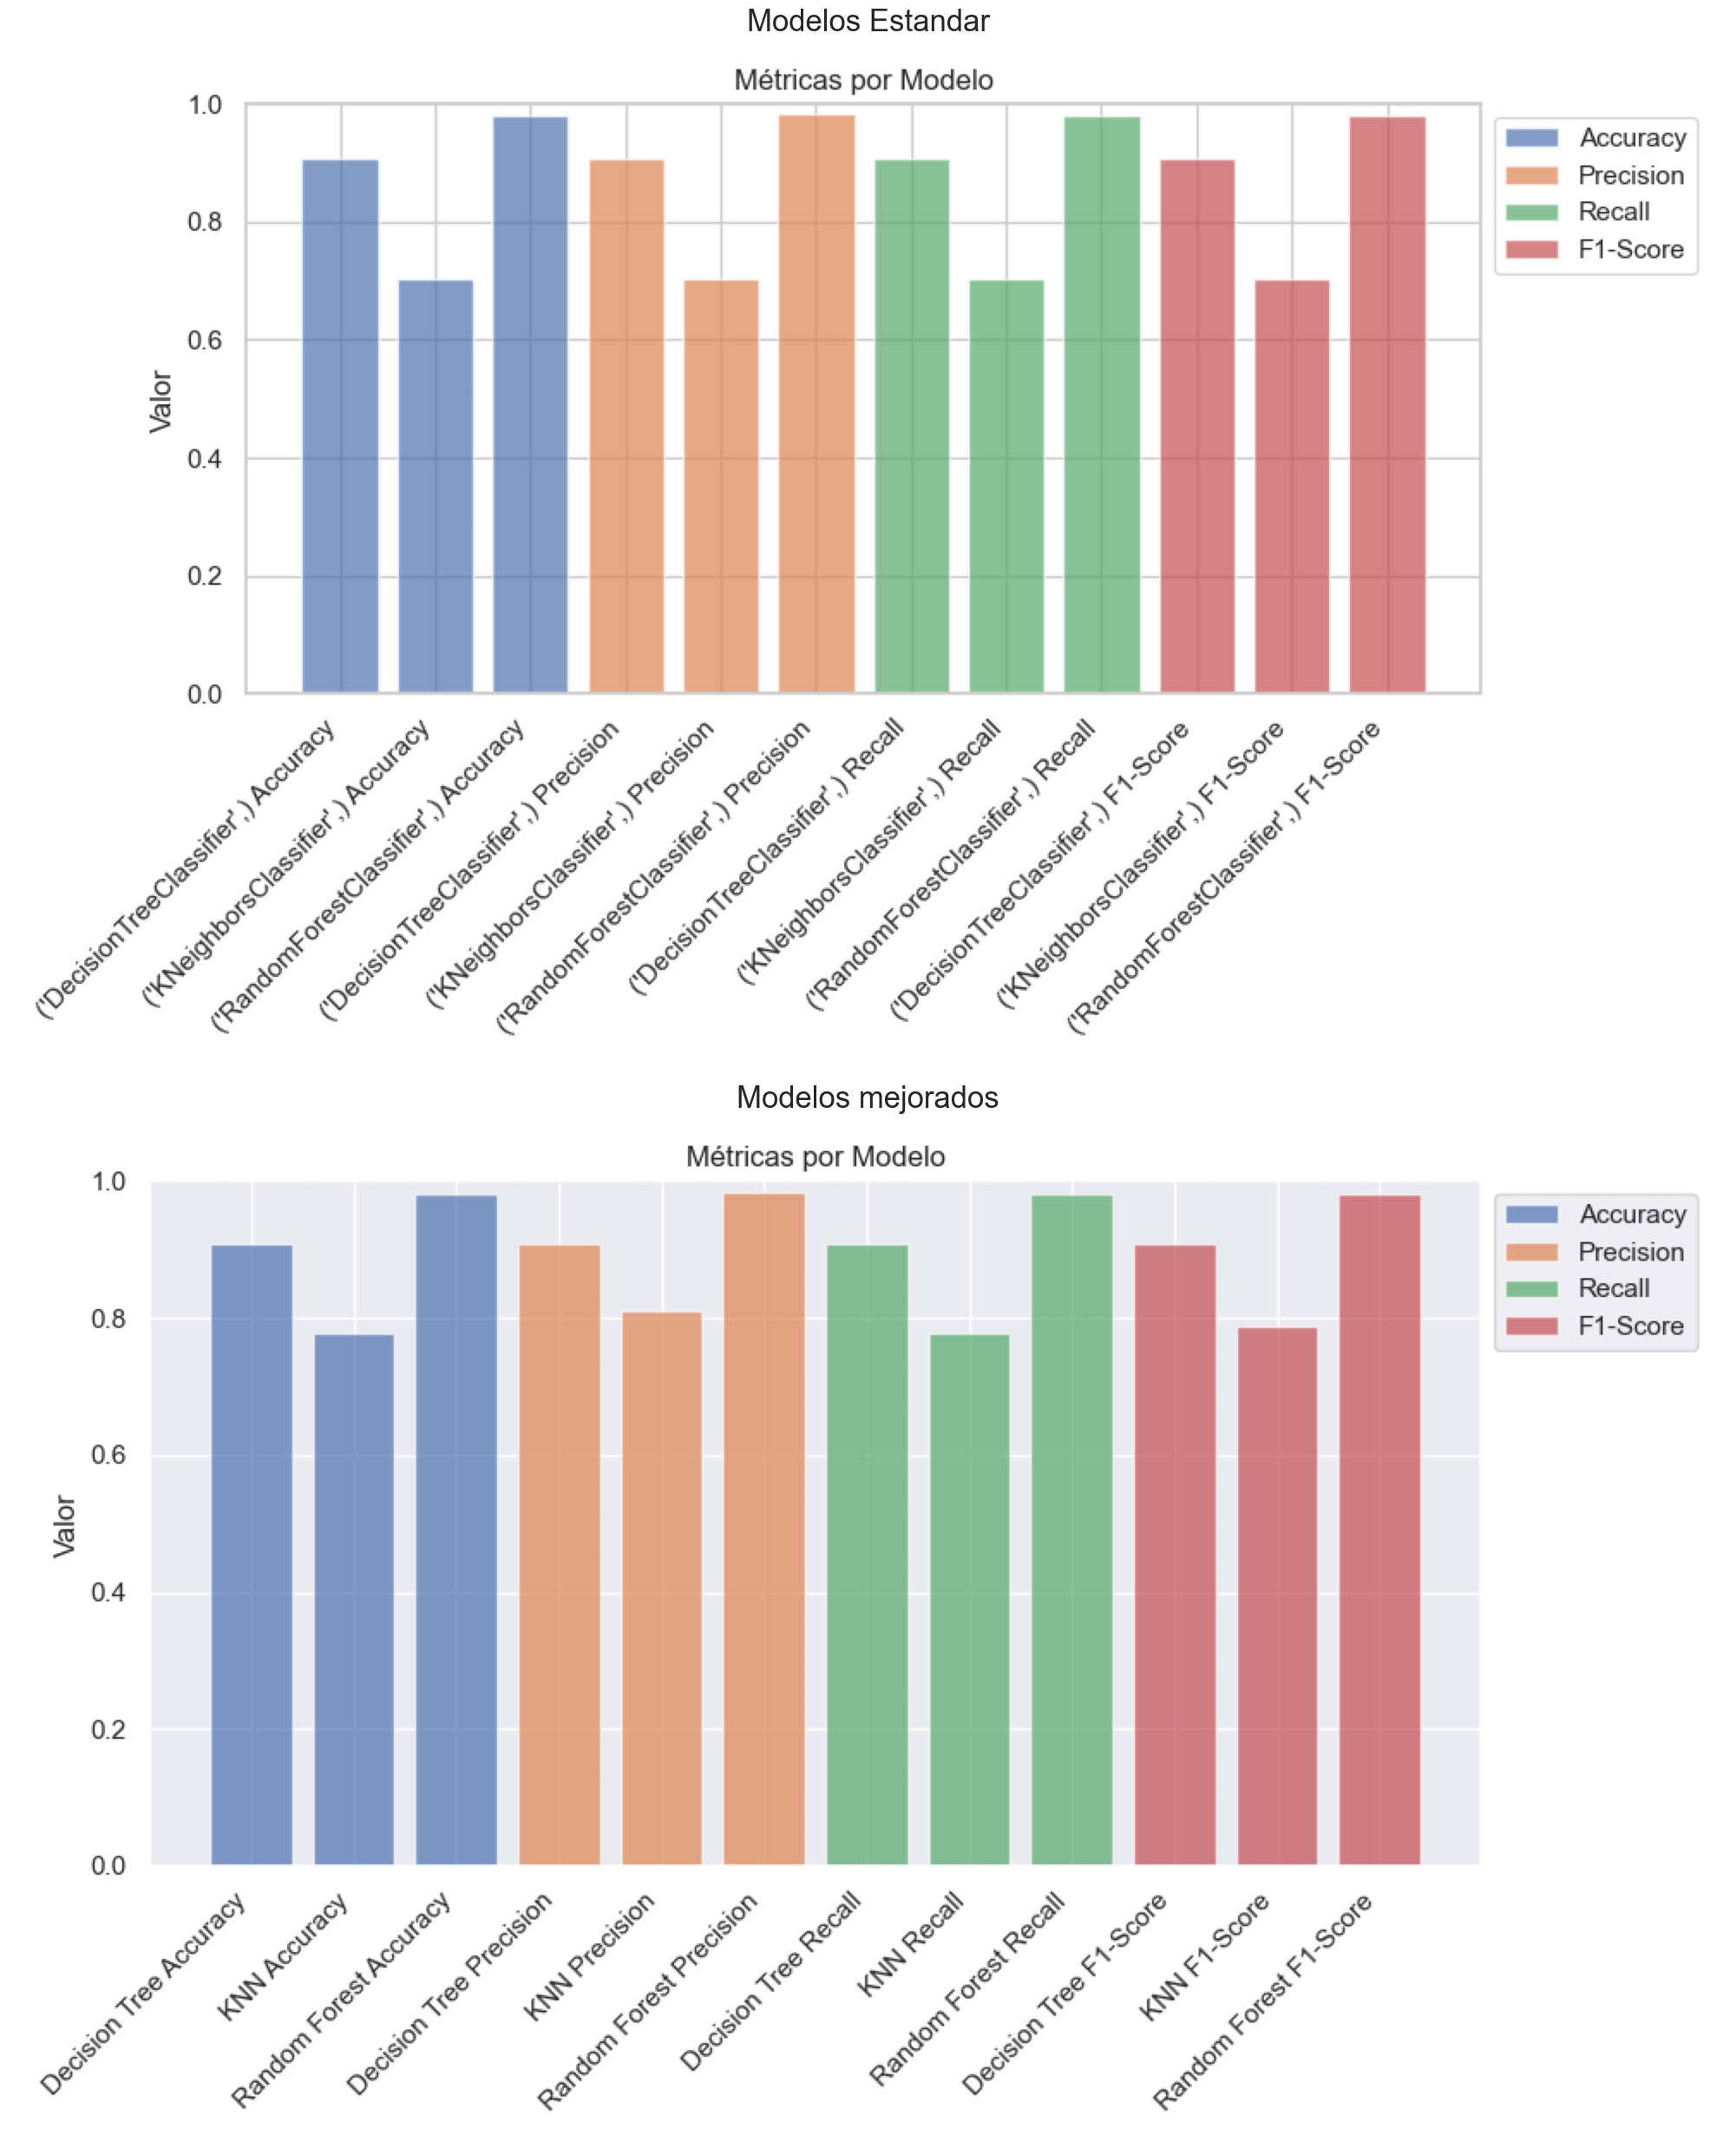

In [521]:
imagen1 = mpimg.imread('Metricas modelos estandar.png')
imagen2 = mpimg.imread('Metricas modelos mejorados.png')
fig, axs = plt.subplots(2, 1, figsize=(25, 25))  # 1 fila, 2 columnas

axs[0].imshow(imagen1)
axs[0].axis('off')
axs[0].set_title('Modelos Estandar', fontsize=25)

axs[1].imshow(imagen2)
axs[1].axis('off') 
axs[1].set_title('Modelos mejorados', fontsize=25)

plt.tight_layout()

plt.show()

Graficamente podemos ver las metricas y las puntuaciones vistas en las tablas anteriores, refleja que RandomForestClassifie y DecisionTreeClassifier tuvieron el mismo comportamiento, mientras que KNeighborsClassifier mejoro sus metricas. 

##### Conclusion de metricas para modelos estandar vs modelos  mejorados:

Los modelos RandomForestClassifie y DecisionTreeClassifier, antes y despues de mejorar sus hiperparametros, tuvieron el mismo rendimiento, esto debido a que las opciones que le di al modelo para mejorar sus parametros, no fueron mejores a las que los modelos traen por defecto, podria explorar mejorando otros parametros o ampliando las opciones que le doy al modelo. El KNeighborsClassifier, si mejoro, con las opciones que le di y que generaron un mejor modelo.

El mejor modelo en general con hiparametros estandar o con parametros mejorados es RandomForestClassifie, sus metricas son muy buenas, casi del 100% de acertividad. 

#### Ejercicio 4
Compara su rendimiento utilizando la aproximación traicionando/test o cross-validation.

In [357]:
best_models2 = [DecisionTreeClassifier(**grid_search_dtc2.best_params_, random_state=42),
          KNeighborsClassifier(**grid_search_knn2.best_params_),
          RandomForestClassifier(**grid_search_rfc2.best_params_, random_state=42)]

Hacemos diccionario para cada modelo con el best_params

In [358]:
from sklearn.model_selection import cross_val_score

He escogido la validacion cruzada por que, es util para conjunto de datos pequeños, ademas proporciona una estimacion mas robusta del rendimiento de los modelos. 

In [359]:
cv_results = []
for model in best_models2:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Puedes cambiar 'r2' por otra métrica según tus necesidades
    model_name = type(model).__name__
    print(f"{model_name} - Mean Cross-Validation Score: {np.mean(scores)}")
    print(f"{model_name} - Cross-Validation Scores: {scores}")
    cv_results.append((model_name, scores))

DecisionTreeClassifier - Mean Cross-Validation Score: 0.7471829629297446
DecisionTreeClassifier - Cross-Validation Scores: [0.86294416 0.54314721 0.72588832 0.8553719  0.74856322]
KNeighborsClassifier - Mean Cross-Validation Score: 0.40005568229435645
KNeighborsClassifier - Cross-Validation Scores: [0.45177665 0.26903553 0.31472081 0.51790634 0.44683908]
RandomForestClassifier - Mean Cross-Validation Score: 0.9451776649746193
RandomForestClassifier - Cross-Validation Scores: [0.90862944 0.90862944 0.90862944 1.         1.        ]


Con la validacion cruzada vemos que el mejor modelo es RandomForestClassifier con una puntuacion de: Mean Cross-Validation Score: 0.9451. A pesar de que el Cross validation nos muestra el mejor puntaje, para el modelo RandomForestClassifier,  debemos asegurarnos del comportamiento de los folds para tomar la decision definitiva, de cual modelo es mejor, por ellos he buscado la Mean Cross-Validation Score y la desviacion estandar de las metricas, para cada modelo.

In [373]:
cv_results = []
for model in best_models2:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    model_name = type(model).__name__
    cv_results.append({
        "Modelo": model_name, 
        "Mean": np.mean(scores), 
        "Std": np.std(scores)
    })
df_results = pd.DataFrame(cv_results)
df_results.to_csv("resultados_cross_val.csv", index=False)
df_results

,Modelo,Mean,Std
0,DecisionTreeClassifier,0.747183,0.115924
1,KNeighborsClassifier,0.400056,0.092953
2,RandomForestClassifier,0.945178,0.044762


logramos comprovar que el mejor modelo es igualmente, el RandomForestClassifier, con una media de 0.94 y una desviacion estandar de 0.044, lo que significa que el comportamiento de los datos, tuvo la dispersion mas baja, respecto a los otros dos modelos, que tuvieron una desviacion estandar de: DecisionTreeClassifier 0.115 y KNeighborsClassifier 0.092. 	  

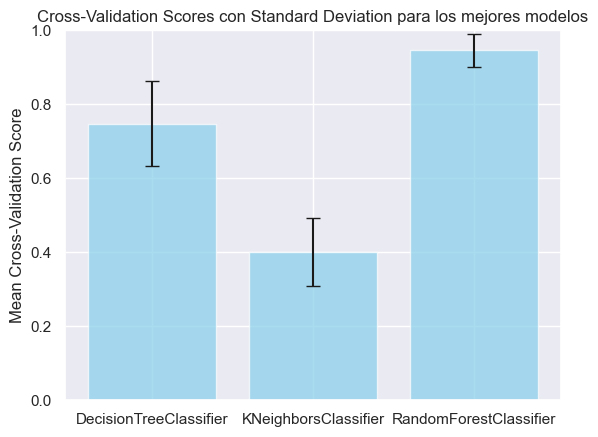

In [376]:
fig, ax = plt.subplots()
ax.bar(df_results['Modelo'], df_results['Mean'], yerr=df_results['Std'], capsize=5, alpha=0.7, color='skyblue')
ax.set_ylabel('Mean Cross-Validation Score')
ax.set_title('Cross-Validation Scores con Standard Deviation para los mejores modelos')
ax.set_ylim(0, 1)
plt.show()

Este grafico de barra de error, nos muestra las puntuaciones de Mean Cross-Validation Score de cada modelo (barras azules) y la linea de error (negra), nos muestra la Standard Deviation de cada modelo, el centro de la barra de error siempre sera el limite de los datos (o borde con Gráficos de Barras). esto nos muestra la dispersion para cada modelo y se identifica que el modelo con menor dispersión y mayor Mean Cross-Validation Score es el  RandomForestClassifier.

##### Conclusión: 
Con la plicacion de Cross validation comprobamos que, el mejor modelo es RandomForestClassifier, con una media de Cross validation de 0.9451 y una desviación estandar de 0.0447, la mas baja de los tres modelos estudiados.

### Ejercicio 5
Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)


Para aplicar procesos de tranformacion, necesito saber que variables tienen una distribucion normal y cuales no y asi elegir la normalización o la estandarizacion de los datos para esto hago una prueba estadistica Shapiro-Wilk 

In [495]:
from sklearn.preprocessing import RobustScaler #No normales con outlier
from sklearn.preprocessing import StandardScaler #Normales
from sklearn.preprocessing import MinMaxScaler #No normales sin outlier

In [496]:
X2= X.copy()
X2.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


#### Test de normalidad para X_train_2

In [497]:
X2.shape

(178, 13)

In [498]:
from scipy.stats import shapiro
for x in X2.columns.values:
    stat, p = shapiro(X2[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.982, p=0.020
Probably not Gaussian
stat=0.889, p=0.000
Probably not Gaussian
stat=0.984, p=0.039
Probably not Gaussian
stat=0.990, p=0.264
Probably Gaussian
stat=0.938, p=0.000
Probably not Gaussian
stat=0.977, p=0.004
Probably not Gaussian
stat=0.955, p=0.000
Probably not Gaussian
stat=0.963, p=0.000
Probably not Gaussian
stat=0.981, p=0.014
Probably not Gaussian
stat=0.940, p=0.000
Probably not Gaussian
stat=0.981, p=0.017
Probably not Gaussian
stat=0.945, p=0.000
Probably not Gaussian
stat=0.931, p=0.000
Probably not Gaussian


quiere decir que: 

- Alcohol                         = No Normal
- Malic acid                      = No normal
- Ash                             = No Normal
- Alcalinity of ash               = Normal
- Magnesium                       = No normal
- Total phenols                   = No normal
- Flavanoids                      = No normal
- Nonflavanoid phenols            = No normal
- Proanthocyanins                 = No normal
- Color intensity                 = No normal
- Hue                             = No normal
- OD280/OD315 of diluted wines    = No normal
- Proline                         = No normal

#### EDA PARA X2

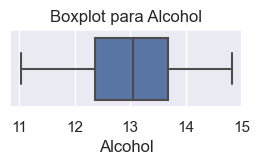

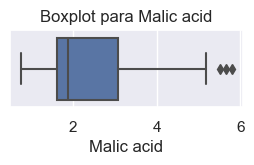

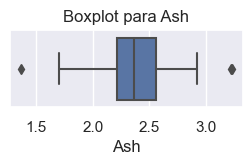

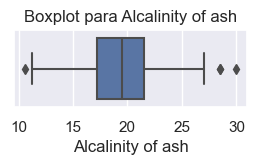

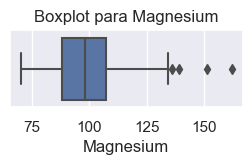

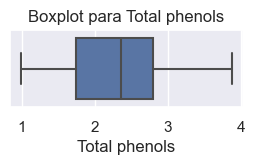

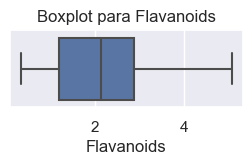

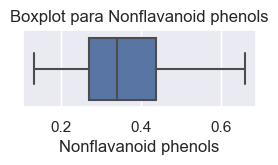

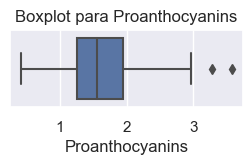

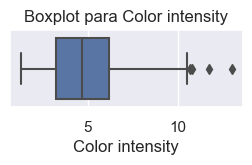

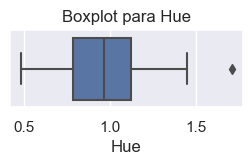

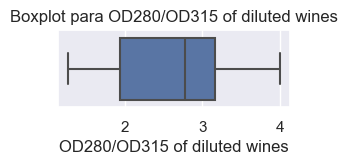

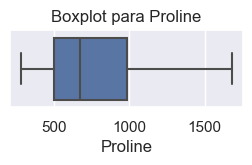

In [499]:
columns= X2.columns
for i in columns:
    plt.figure(figsize=(3, 1))
    sns.set()
    sns.boxplot(x=X2[i])
    plt.title(f'Boxplot para {i}')
    plt.show()

para acompañar nuestra prueba de normalizacion, decido graficar las variables del conjunto X2, Con estos Boxplot podemos identificar los atributos que tienen datos extremos o llamados outliers y no son normales  ("Malic acid", "Ash", "Magnesium", "Proanthocynins", "Color intensity", "Hue"). el unico normal y con ouliers es "Alcalinity of Ash".

#### Tranformaciones numericas para X2

In [500]:
columnas_escalar=["Alcalinity of ash"]
scaler = StandardScaler()
X2[columnas_escalar] = scaler.fit_transform(X2[columnas_escalar])

Para el caso de los Normales, con outliers usamos la tecnica StandardScaler, que nos estandariza los numeros de las columnas.

In [501]:
columnas_escalar=['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']
scaler = MinMaxScaler()
X2[columnas_escalar] = scaler.fit_transform(X2[columnas_escalar])

Para el caso de los No normales, sin outliers usamos la tecnica MinMaxScaler, que nos normaliza los numeros de las columnas. 

In [502]:
columnas_escalar=['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue', ]
scaler = RobustScaler()
X2[columnas_escalar] = scaler.fit_transform(X2[columnas_escalar])

Para el caso de los No normales, con outliers usamos la tecnica MinMaxScaler, que nos normaliza los numeros de las columnas. 

In [503]:
X2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [504]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y, test_size=0.3, random_state=1)

In [505]:
X_train_2.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
90,0.276316,-0.023649,-0.115108,-0.298767,-0.894737,0.213793,0.244726,0.735849,0.121429,-0.768456,0.340741,0.366300,0.144080
95,0.378947,-0.233108,-0.460432,-0.148624,3.368421,0.524138,0.407173,0.358491,2.464286,-0.701342,0.577778,0.498168,0.470043
28,0.747368,0.023649,1.266187,-0.028510,0.473684,0.679310,0.554852,0.452830,0.292857,-0.063758,0.844444,0.780220,0.454351


In [506]:
best_models3 = [DecisionTreeClassifier(**grid_search_dtc2.best_params_, random_state=42),
          KNeighborsClassifier(**grid_search_knn2.best_params_),
          RandomForestClassifier(**grid_search_rfc2.best_params_, random_state=42)]

In [507]:
predictions3 = {}
for model in best_models3:
    model.fit(X_train_2, y_train_2)
    y_pred = model.predict(X_test_2)
    predictions3[type(model).__name__,] = y_pred
df_predictions3 = pd.DataFrame(predictions3)

Entrenamos y predecimos con nuestros modelos mejorados para nuestros conjuntos X_train_2,  y_train_2 y X_test_2 con tranformaciones numericas 

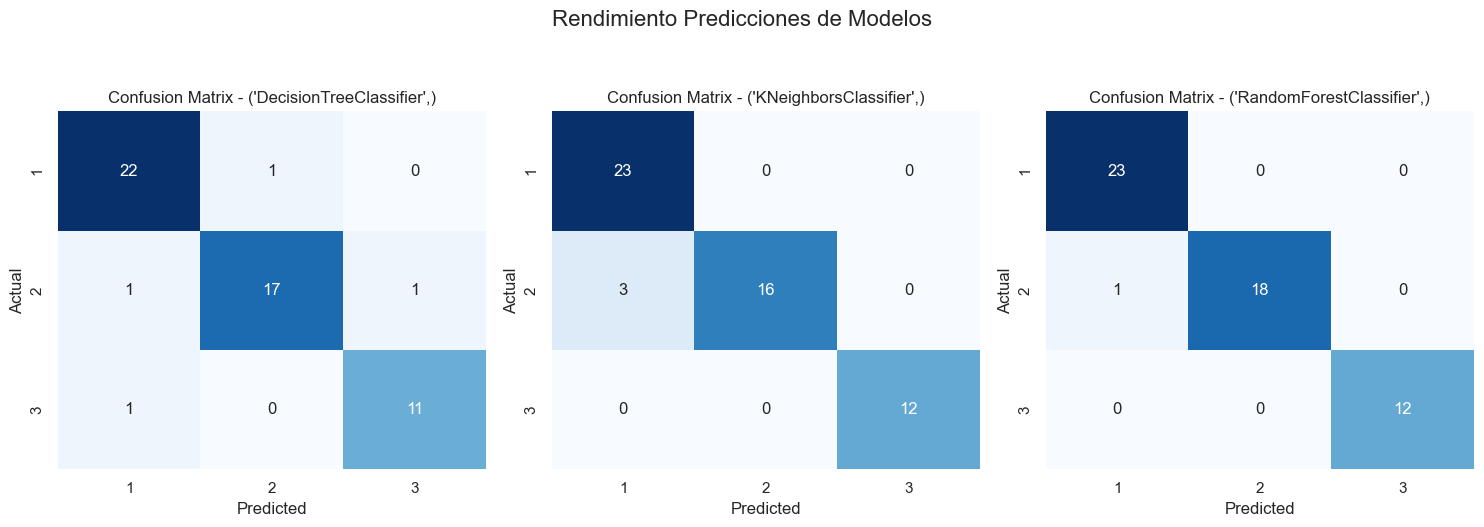

In [508]:
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')
classes = sorted(y_test_2.unique())
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, model_name in enumerate(predictions3.keys()):
    cm_model = confusion_matrix(y_test_2, predictions3[model_name])
    plot_confusion_matrix(axes[i], cm_model, model_name)
plt.suptitle('Rendimiento Predicciones de Modelos', y=1.05, fontsize=16)
plt.tight_layout()
plt.savefig('Rendimiento Predicciones de Modelos mejorados con tranformaciones numericas.png')
plt.show()

##### Matriz de Confusión Multiclase para valorar redimiento de modelos mejorados para conjunto de datos tranformado:

Observamos que las mejores predicciones fueron del modelo RandomForestClassifier:

- Class 1: 23 predicciones acertadas de 23.
- Clase 2: 18 predicicones acertadas de 19. 
- Clase 3: 12 predicciones acertadas de 12. 


KNeighborsClassifier

- Class 1: 23 predicciones acertadas de 23.
- Clase 2: 16 predicicones acertadas de 19. 3 las clasifico como Class 1
- Clase 3: 12 predicciones acertadas de 12.   

DecisionTreeClassifier

- Class 1: 22 predicciones acertadas de 23. 1 la clasifico como Class 2
- Clase 2: 17 predicicones acertadas de 19. 1 la predijo como class 1 y 1 como Class 3
- Clase 3: 11 predicciones acertadas de 12. 1 la predijo como Class 1.

##### Comparacion Grafica de Rendimiento de  Modelos Mejorados para ocnjunto de datos orginal y tranformado:

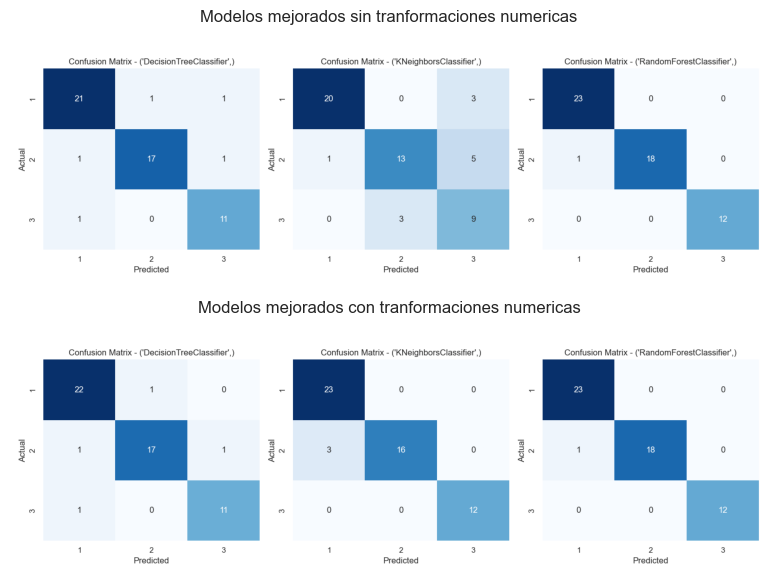

In [509]:
imagen1 = mpimg.imread('Rendimiento Predicciones de Modelos mejorados.png')
imagen2 = mpimg.imread('Rendimiento Predicciones de Modelos mejorados con tranformaciones numericas.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos mejorados sin tranformaciones numericas')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados con tranformaciones numericas')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

##### RandomForestClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 23 predicciones acertadas de 23 vs Class 1 modelo mejorado con conjunto de datos transformado: 23 predicciones acertadas de 23
- Clase 2 modelo mejorado: 18 predicicones acertadas de 19 VS Class 2 modelo mejorado con conjunto de datos transformado: 18 predicicones acertadas de 19
- Clase 3 modelo mejorado: 12 predicciones acertadas de 12 VS Class 3 modelo mejorado con conjunto de datos transformado: 12 predicciones acertadas de 12

Mantuvo la acertividad igual de las predicciones con el conjunto de datos tranformado y con el modelo mejorado.

##### KNeighborsClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 20 predicciones acertadas de 23 vs Class 1 modelo mejorado con conjunto de datos transformado: 23 predicciones acertadas de 23
- Clase 2 modelo mejorado: 13 predicicones acertadas de 19. vs Class 2 modelo mejorado con conjunto de datos transformado: 16 predicciones acertadas de 19 
- Clase 3 modelo mejorado: 9 predicciones acertadas de 12. vs Class 3 modelo mejorado con conjunto de datos transformado: 12 predicciones acertadas de 12

Mejoró las predicciones con el conjunto de datos tranformado.

##### DecisionTreeClassifier mejorado con hiperparametros 

- Class 1 modelo mejorado: 21 predicciones acertadas de 23 vs Class 1 modelo mejorado con conjunto de datos transformado: 22 predicciones acertadas de 23
- Clase 2 modelo mejorado: 17 predicicones acertadas de 19. vs Class 2 modelo mejorado con conjunto de datos transformado: 17 predicciones acertadas de 19 
- Clase 3 modelo mejorado: 11 predicciones acertadas de 12. vs Class 3 modelo mejorado con conjunto de datos transformado: 11 predicciones acertadas de 12

DecisionTreeClassifier mejorado, con tranformaciones en X, tuvo las misma acertividad que con el conjunto de datos sin tranformaciones.

In [510]:
output3 = []
for model in df_predictions3: #hacemos un ciclo for
    accuracy = accuracy_score(y_test_2, df_predictions3[model])
    precision = precision_score(y_test_2, df_predictions3[model], average='weighted')
    recall = recall_score(y_test_2, df_predictions3[model], average='weighted')
    f1 = f1_score(y_test_2, df_predictions3[model], average='weighted')
    output3.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    })
output_df3 = pd.DataFrame(output3)
output_df3.to_csv('Evaluacion de modelos mejorados y conjunto transformado.csv', index=False)
output_df3

,Model,Accuracy,Precision,Recall,F1-Score
0,"(DecisionTreeClassifier,)",0.925926,0.926440,0.925926,0.925766
1,"(KNeighborsClassifier,)",0.944444,0.950855,0.944444,0.943764
2,"(RandomForestClassifier,)",0.981481,0.982253,0.981481,0.981428


##### Comparación de metricas de modelos con conjunto de datos original y tranformado:

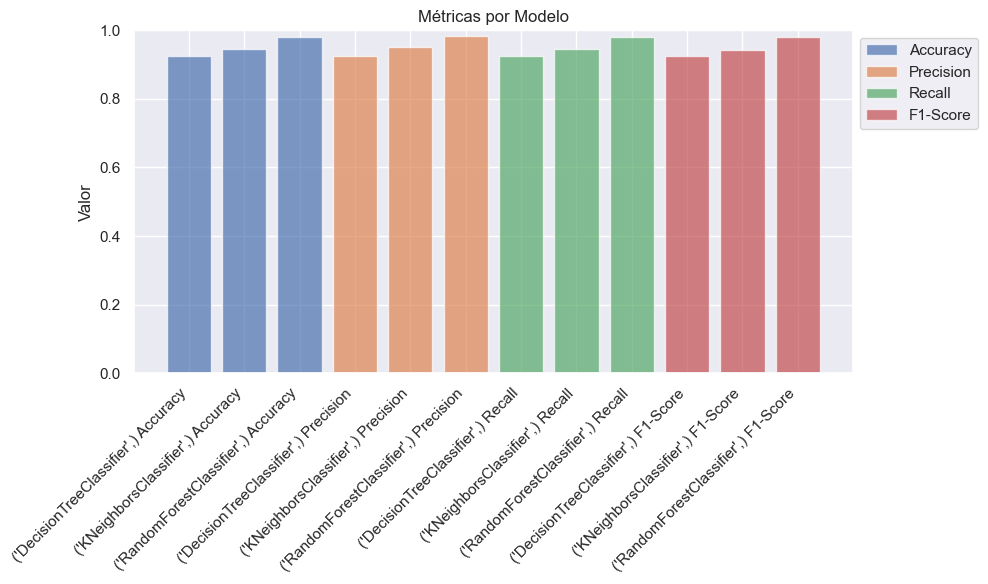

In [484]:
fig, ax = plt.subplots(figsize=(10, 6))

models = output_df3['Model'].map(lambda x: str(x))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for metric in metrics:
    ax.bar(models + f' {metric}', output_df3[metric], alpha=0.7, label=metric)

ax.set_ylim(0, 1)
ax.set_ylabel('Valor')
ax.set_title('Métricas por Modelo')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Metricas_modelos_mejorados con conjunto de datos transformado.png')
plt.show()

##### RandomForestClassifier:

Es el mejor modelo con el conjunto de datos transformado.
- Accuracy: 0.98
- Precision: 0.98
- Recall: 	0.98
- F1-Score: 0.98

##### KNeighborsClassifier:

Tiene unas metricas buenas aunque no fue el mejor de los tres modelos. 
- Accuracy: 0.94
- Precision: 0.95
- Recall: 	0.94
- F1-Score: 0.94

##### DecisionTreeClassifier

tiene unas metricas igualmente buenas pero de los tres modelos es el tercer mejor.
- Accuracy: 0.92
- Precision: 0.92
- Recall: 	0.92
- F1-Score: 0.92

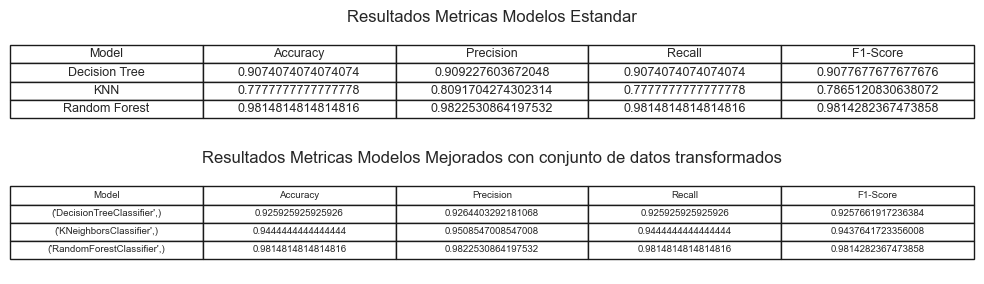

In [444]:
resultados1 = pd.read_csv('Evaluacion de modelos mejorados con metricas.csv')
resultados2 = pd.read_csv('Evaluacion de modelos mejorados y conjunto transformado.csv')
# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Metricas Modelos Estandar')
# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off') 
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Metricas Modelos Mejorados con conjunto de datos transformados')
plt.tight_layout()
plt.show()

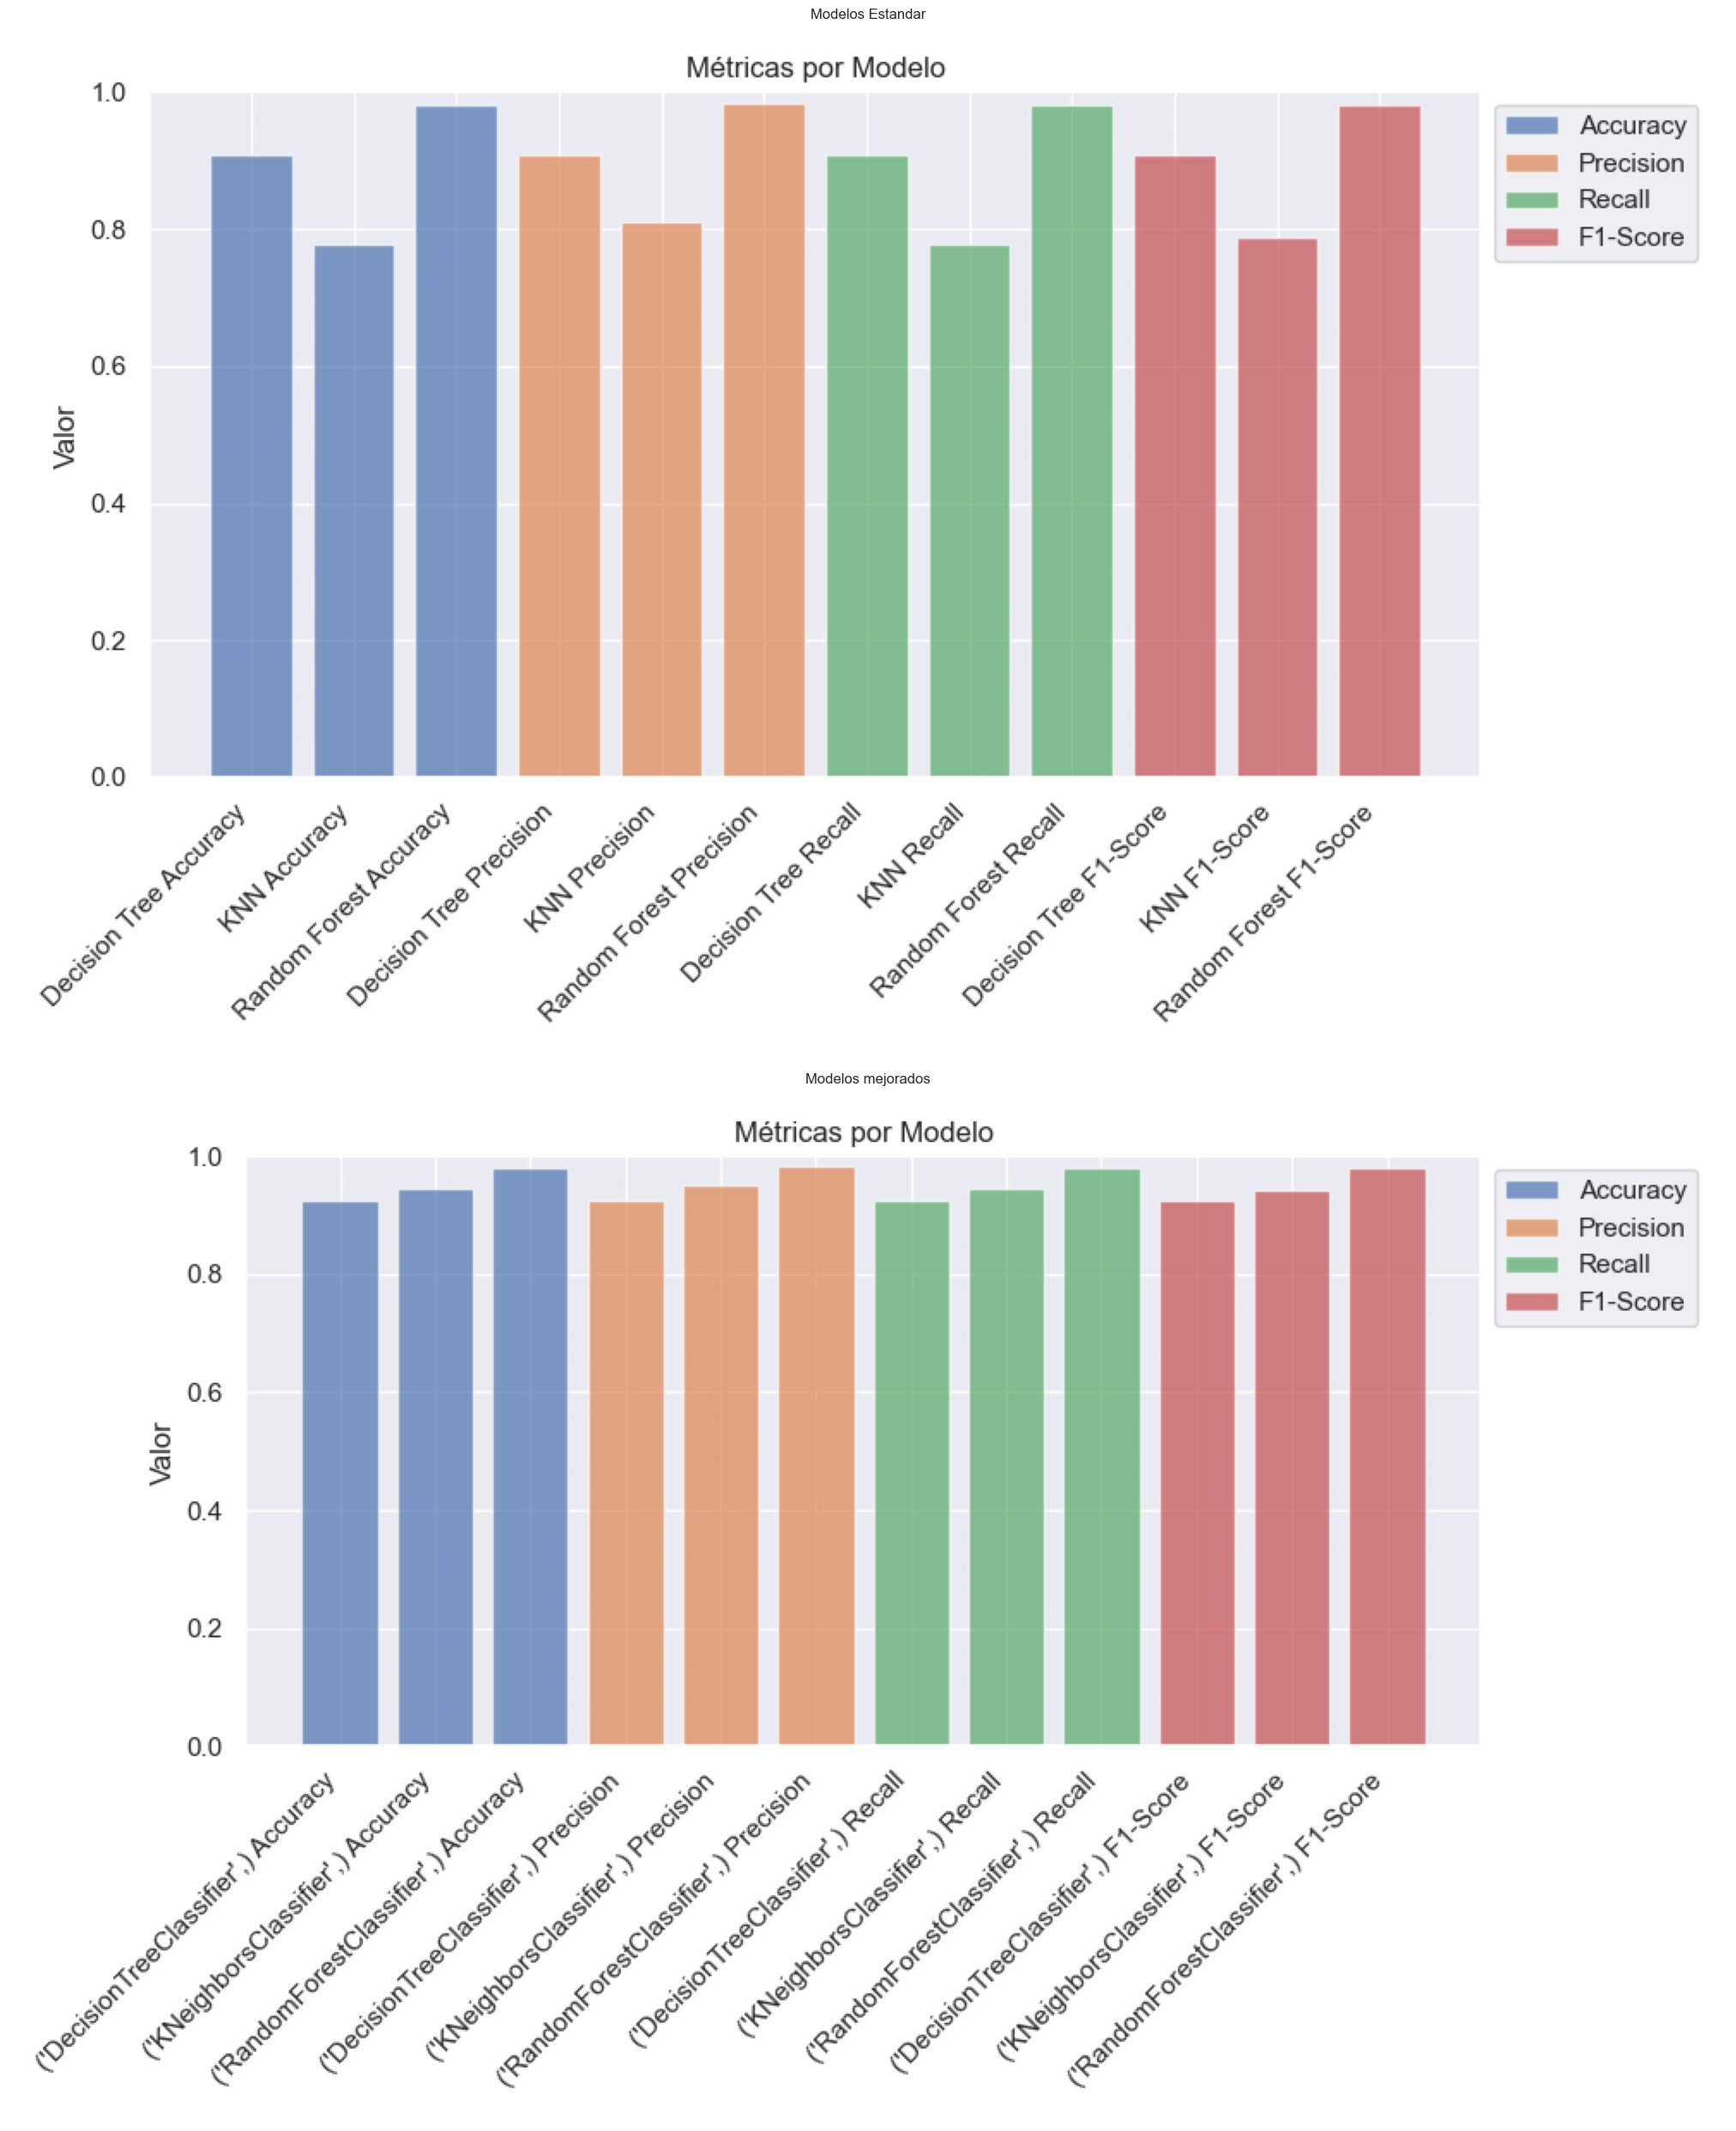

In [485]:
imagen1 = mpimg.imread('Metricas modelos mejorados.png')
imagen2 = mpimg.imread('Metricas_modelos_mejorados con conjunto de datos transformado.png')
fig, axs = plt.subplots(2, 1, figsize=(25, 25))  # 1 fila, 2 columnas

axs[0].imshow(imagen1)
axs[0].axis('off')
axs[0].set_title('Modelos Estandar')

axs[1].imshow(imagen2)
axs[1].axis('off') 
axs[1].set_title('Modelos mejorados')

plt.tight_layout()

plt.show()

Las metricas de los modelos se comportaron de la siguiente forma con el conjunto de datos transformado:

##### RandomForestClassifier mejorado con hiperparametros aplicado al conjunto de datos transformado :

El modelo se comporto igual para las metricas en el conjunto de datos original y transformado en todas las metricas evaluadas: Accuracy, Precision, Recall, F1-Score. 

##### KNeighborsClassifier mejorado con hiperparametros aplicado al conjunto de datos transformado:

Para este modelo, las metricas mejoraron con el conjunto de datos tranformado respecto al original:

##### Accuracy:
- Modelo mejorado con conjunto de datos original 0.7777 vs Modelo mejorado con conjunto de datos transformado: 0.9444

##### Precision: 
- Modelo mejorado con conjunto de datos original 0.8091 vs Modelo mejorado con conjunto de datos transformado: 0.9508

#####  Recall: 
- Modelo mejorado con conjunto de datos original 0.7777 vs Modelo mejorado con conjunto de datos transformado: 0.9444

#####  F1-Score: 
- Modelo mejorado con conjunto de datos original 0.7865 vs Modelo mejorado con conjunto de datos transformado: 0.9437

##### DecisionTreeClassifier mejorado con hiperparametros aplicado al conjunto de datos transformado: 
Para este modelo, las metricas mejoraron con el conjunto de datos tranformado respecto al original:

##### Accuracy:
- Modelo mejorado con conjunto de datos original 0.9074 vs Modelo mejorado con conjunto de datos transformado: 0.9259

##### Precision: 
- Modelo mejorado con conjunto de datos original 0.9092 vs Modelo mejorado con conjunto de datos transformado: 0.9264

#####  Recall: 
- Modelo mejorado con conjunto de datos original 0.9074 vs Modelo mejorado con conjunto de datos transformado: 0.9259

#####  F1-Score: 
- Modelo mejorado con conjunto de datos original 0.9077 vs Modelo mejorado con conjunto de datos transformado: 0.9257.

##### CONCLUSIÓN:  
La transformacion del conjunto de datos, aumenta la calidad de las predicciones de los modelos mejorados, lo que resulta en el mejoramiento de las metricas y un mejor rendimiento.

##### CONCLUSIÓN GENERAL DE LA TAREA:

Tanto el mejoramiento de los modelos, con la busqueda de los mejores hiperparametros; como las tranformaciones son importantes para obtener unos buenos rendimientos y evaluacion de los modelos. 